# Women Clothing Review Analysis

In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#stats
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords


#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import textblob
import xgboost

from textblob import TextBlob
from nltk.stem import PorterStemmer

## Reading the data

In [2]:
review_data = pd.read_excel("Womens Clothing Reviews Data.xlsx")
df = review_data.copy()
df.head()

Product ID        Category Subcategory1 SubCategory2   Location Channel  \
0         767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1        1080         General      Dresses      Dresses  Bangalore  Mobile   
2        1077         General      Dresses      Dresses    Gurgaon  Mobile   
3        1049  General Petite      Bottoms        Pants    Chennai     Web   
4         847         General         Tops      Blouses  Bangalore     Web   

   Customer Age             Review Title  \
0            33                      NaN   
1            34                      NaN   
2            60  Some major design flaws   
3            50         My favorite buy!   
4            47         Flattering shirt   

                                         Review Text  Rating  Recommend Flag  
0  Absolutely wonderful - silky and sexy and comf...       4               1  
1  Love this dress!  it's sooo pretty.  i happene...       5               1  
2  I had such high hopes for this dress and reall...       3               0  
3  I love, love, love this jumpsuit. it's fun, fl...       5               1  
4  This shirt is very flattering to all due to th...       5               1

In [3]:
df.shape

(23486, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


## a. Performing exploratory analysis on the data to understand the patterns

## we have pandas profiling report generator for doing the EDA at a glance

In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)

In [6]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.describe().T

count        mean         std   min    25%    50%     75%  \
Product ID      23486.0  918.118709  203.298980   0.0  861.0  936.0  1078.0   
Customer Age    23486.0   43.198544   12.279544  18.0   34.0   41.0    52.0   
Rating          23486.0    4.196032    1.110031   1.0    4.0    5.0     5.0   
Recommend Flag  23486.0    0.822362    0.382216   0.0    1.0    1.0     1.0   

                   max  
Product ID      1205.0  
Customer Age      99.0  
Rating             5.0  
Recommend Flag     1.0

In [8]:
df.describe(include = 'object').T

count unique                                                top  \
Category      23472      3                                            General   
Subcategory1  23472      6                                               Tops   
SubCategory2  23472     20                                            Dresses   
Location      23486      4                                            Gurgaon   
Channel       23486      2                                                Web   
Review Title  19676  13993                                           Love it!   
Review Text   22641  22634  Perfect fit and i've gotten so many compliment...   

               freq  
Category      13850  
Subcategory1  10468  
SubCategory2   6319  
Location       8821  
Channel       13583  
Review Title    136  
Review Text       3

## Category count

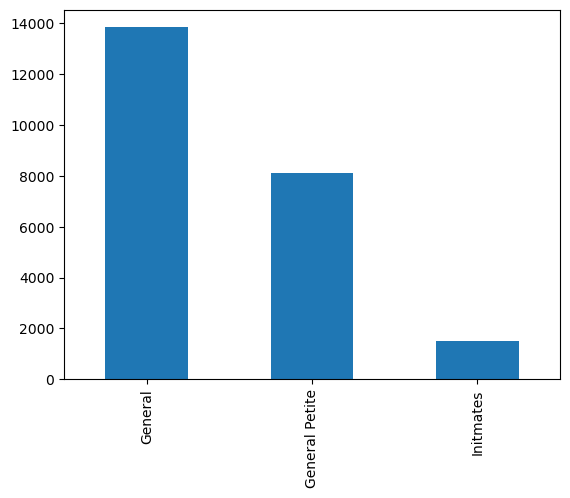

In [9]:
%matplotlib inline
df.Category.value_counts().plot(kind = 'bar')
plt.show()

## Subcategory1 count

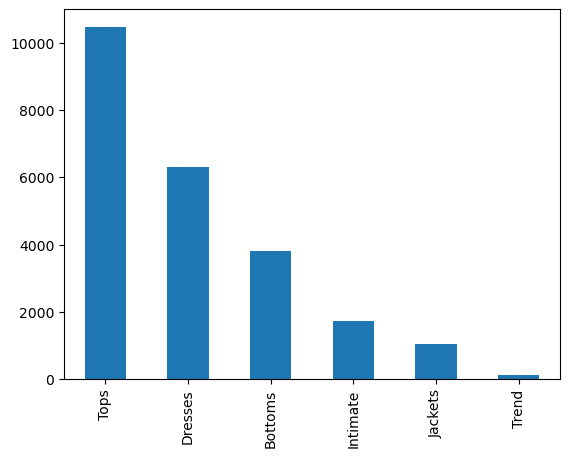

In [10]:
df.Subcategory1.value_counts().plot(kind = 'bar')
plt.show()

## Subcategory2 count

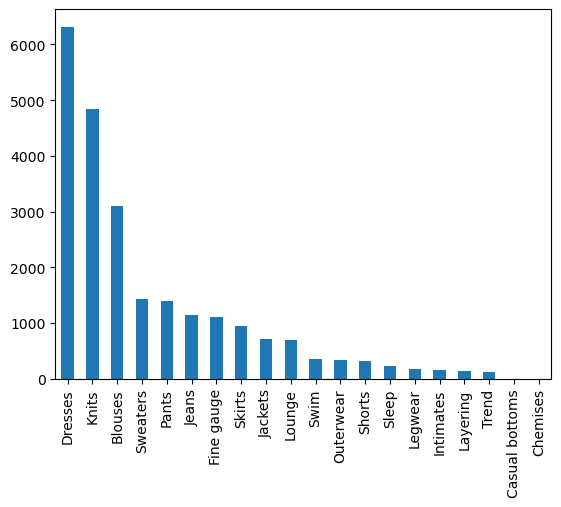

In [11]:
df.SubCategory2.value_counts().plot(kind = 'bar')
plt.show()

## Location count

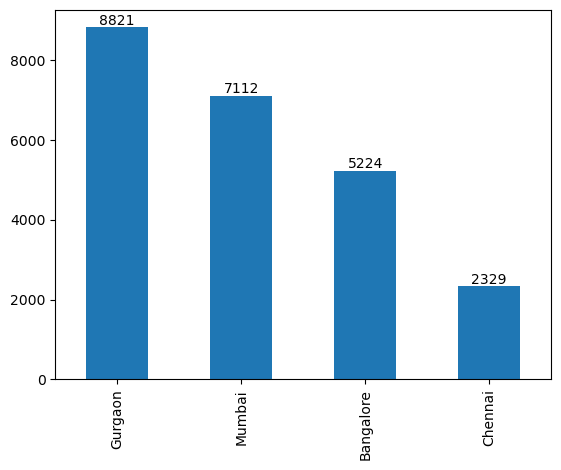

In [12]:
ax=df.Location.value_counts().plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center',
    xytext = (0,5), textcoords = 'offset points')
plt.show()

## Channel count

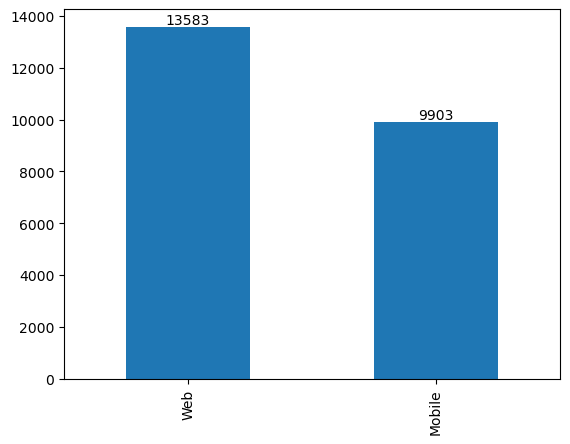

In [13]:
ax=df.Channel.value_counts().plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Age distribution

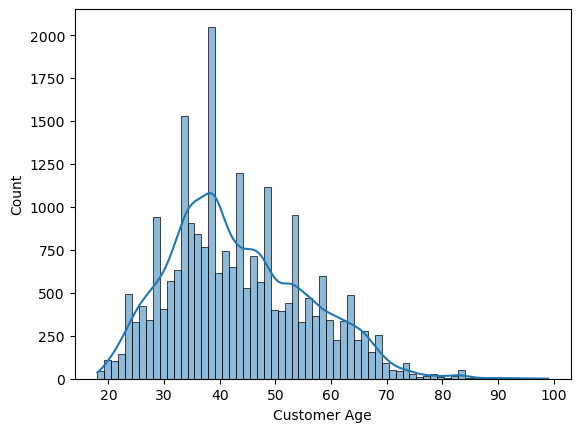

In [14]:
sns.histplot(x = df['Customer Age'], kde = True)
plt.show()

## Rating count

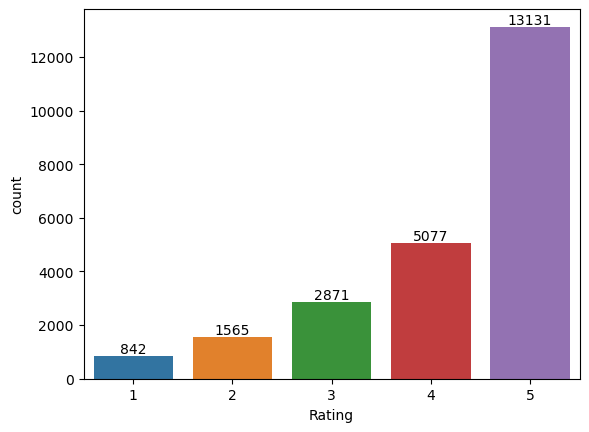

In [15]:
ax = sns.countplot(x = df.Rating)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

## Recommend flag count

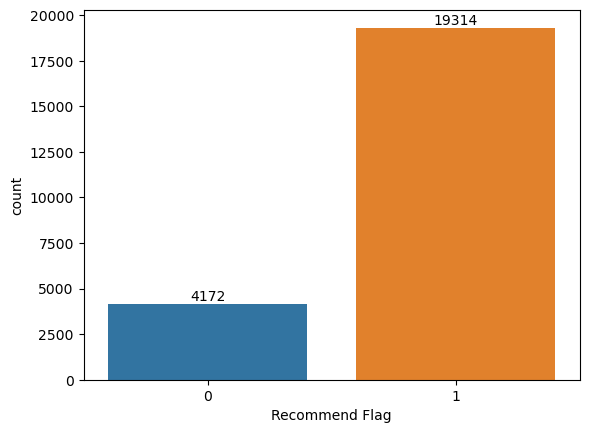

In [16]:
ax=sns.countplot(x = df['Recommend Flag'])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()


## Category Vs Recommend flag

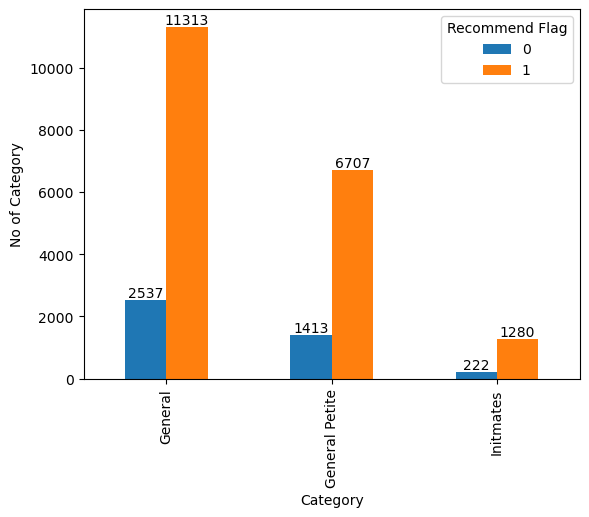

In [17]:
cat_recommend = pd.crosstab(index = df.Category, columns = df['Recommend Flag'], values = df['Recommend Flag'], aggfunc = 'count')
ax = cat_recommend.plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2, p.get_height()),
               ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.ylabel("No of Category") 
plt.show()

## Category Vs Rating

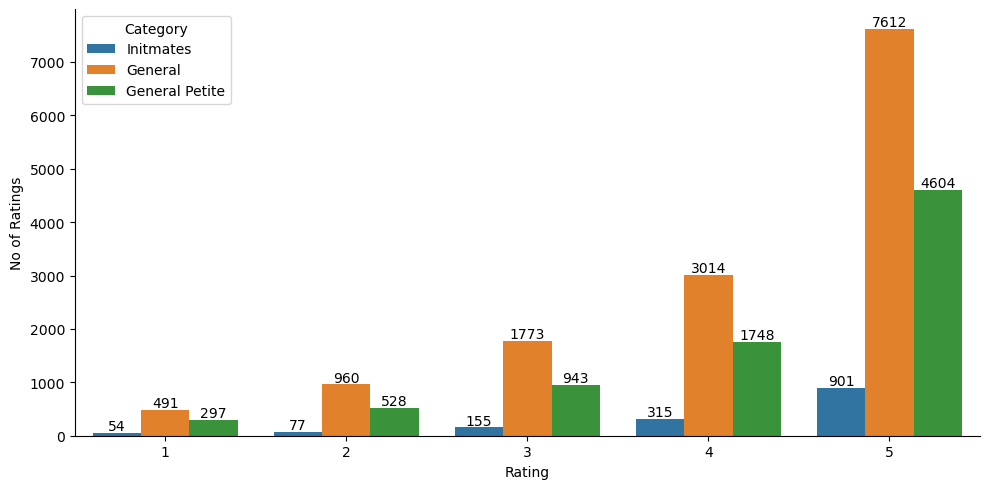

In [18]:
g = sns.catplot(data = df, x ="Rating", hue = "Category", kind='count', height=5, aspect=2, legend_out=False)
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2, p.get_height()),
               ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.ylabel("No of Ratings") 
plt.show()

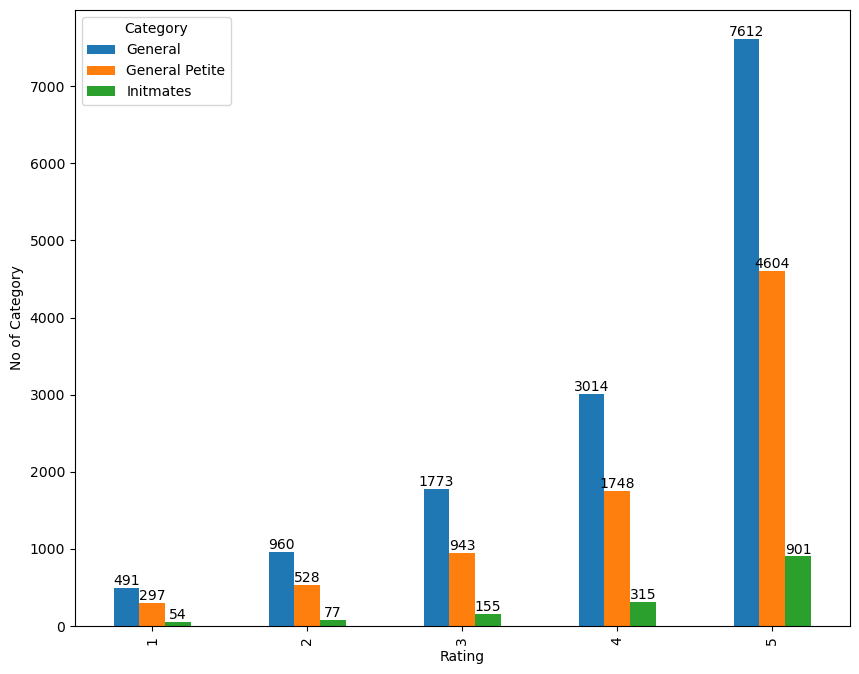

In [19]:
cat_rating = pd.crosstab(index = df.Rating, columns = df['Category'], values = df['Rating'], aggfunc = 'count')
ax = cat_rating.plot(kind = 'bar', figsize = (10,8))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2, p.get_height()),
               ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.ylabel("No of Category") 
plt.show()

## Subcategory1 vs recommend flag

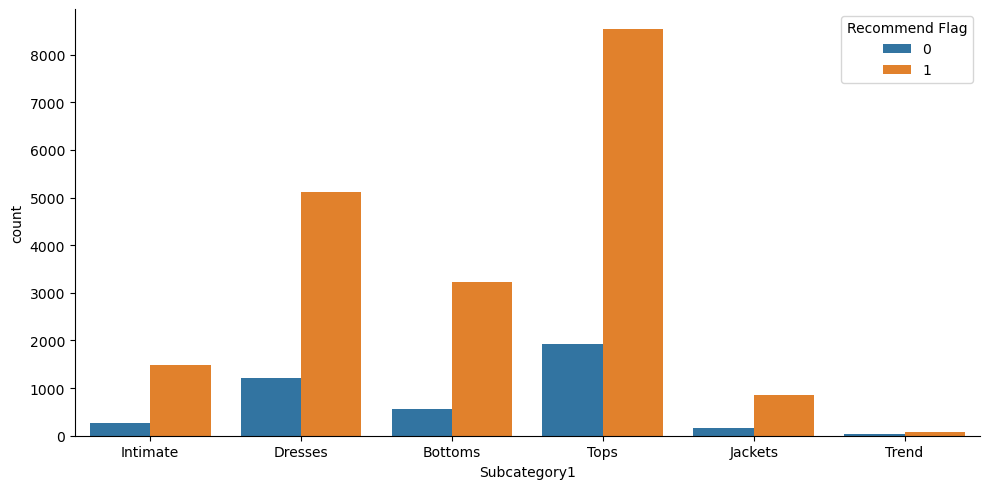

In [20]:
g = sns.catplot(data = df, x ="Subcategory1", hue = "Recommend Flag", kind='count', height=5, aspect=2, legend_out=False)

## Subcategory1 vs Rating

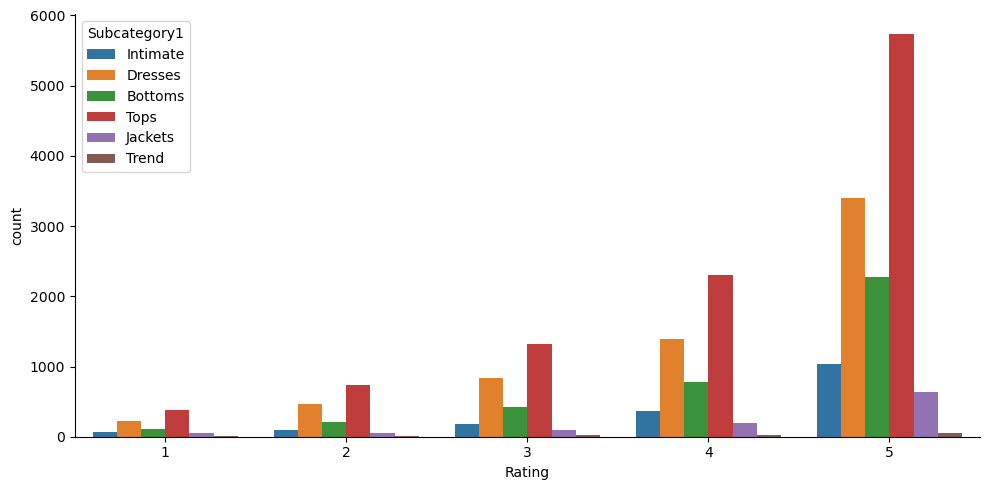

In [21]:
g = sns.catplot(data = df, x ="Rating", hue = "Subcategory1", kind='count', height=5, aspect=2, legend_out=False)

## SubCategory2 distribution

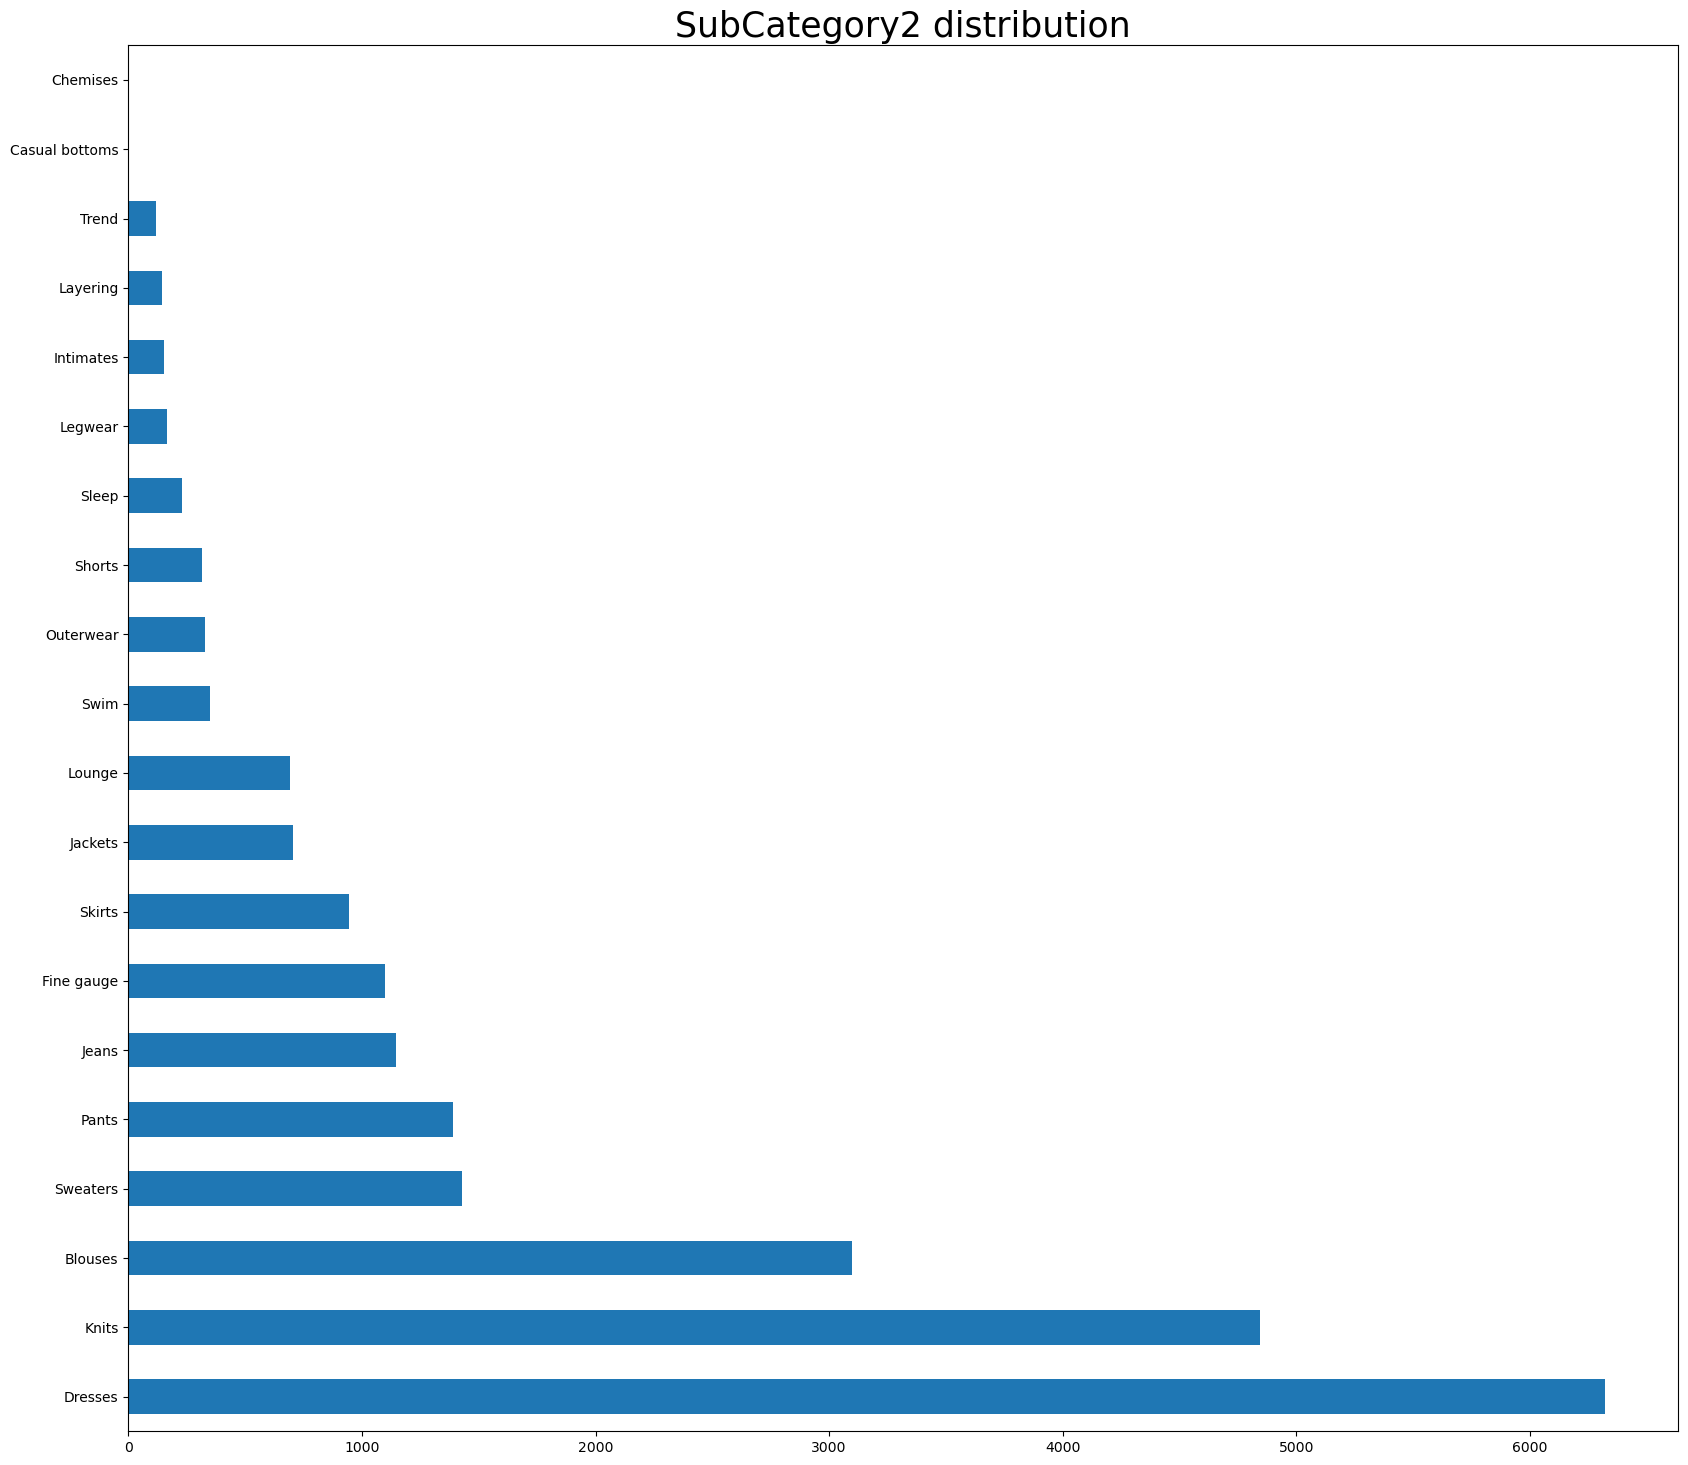

In [24]:
plt.title('SubCategory2 distribution', fontsize = 25)
df["SubCategory2"].value_counts().plot(kind="barh", figsize=(20, 18))
plt.show()

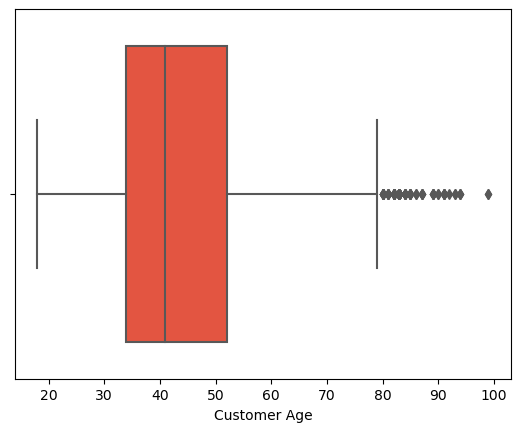

In [25]:
sns.boxplot(x = df['Customer Age'], palette = 'CMRmap')
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [27]:
x = df['Review Text'][2]
x

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [28]:

len(re.findall(r'[.!?]',str(x)))+1

6

In [29]:
review_data.head()

Product ID        Category Subcategory1 SubCategory2   Location Channel  \
0         767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1        1080         General      Dresses      Dresses  Bangalore  Mobile   
2        1077         General      Dresses      Dresses    Gurgaon  Mobile   
3        1049  General Petite      Bottoms        Pants    Chennai     Web   
4         847         General         Tops      Blouses  Bangalore     Web   

   Customer Age             Review Title  \
0            33                      NaN   
1            34                      NaN   
2            60  Some major design flaws   
3            50         My favorite buy!   
4            47         Flattering shirt   

                                         Review Text  Rating  Recommend Flag  
0  Absolutely wonderful - silky and sexy and comf...       4               1  
1  Love this dress!  it's sooo pretty.  i happene...       5               1  
2  I had such high hopes for this dress and reall...       3               0  
3  I love, love, love this jumpsuit. it's fun, fl...       5               1  
4  This shirt is very flattering to all due to th...       5               1

In [30]:
review_data.isna().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [31]:
review_data.drop(columns = 'Review Title', inplace = True)

In [32]:
review_data.isna().sum()

Product ID          0
Category           14
Subcategory1       14
SubCategory2       14
Location            0
Channel             0
Customer Age        0
Review Text       845
Rating              0
Recommend Flag      0
dtype: int64

In [33]:
review_data.Category.fillna(review_data.Category.mode()[0], inplace = True)
review_data.Subcategory1.fillna(review_data.Subcategory1.mode()[0], inplace = True)
review_data.SubCategory2.fillna(review_data.SubCategory2.mode()[0], inplace = True)

In [34]:
review_data.isna().sum()

Product ID          0
Category            0
Subcategory1        0
SubCategory2        0
Location            0
Channel             0
Customer Age        0
Review Text       845
Rating              0
Recommend Flag      0
dtype: int64

In [35]:
review_data.dropna(inplace = True)

In [36]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      22641 non-null  int64 
 1   Category        22641 non-null  object
 2   Subcategory1    22641 non-null  object
 3   SubCategory2    22641 non-null  object
 4   Location        22641 non-null  object
 5   Channel         22641 non-null  object
 6   Customer Age    22641 non-null  int64 
 7   Review Text     22641 non-null  object
 8   Rating          22641 non-null  int64 
 9   Recommend Flag  22641 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.9+ MB


In [37]:
## Detecting space in Review Text
review_data["Review Text"].str.isspace().sum()

0

In [38]:
review_data['count_sentence'] = review_data["Review Text"].apply(lambda x: len(re.findall(r'[.!?]',str(x)))+1)

In [39]:
review_data.head()

Product ID        Category Subcategory1 SubCategory2   Location Channel  \
0         767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1        1080         General      Dresses      Dresses  Bangalore  Mobile   
2        1077         General      Dresses      Dresses    Gurgaon  Mobile   
3        1049  General Petite      Bottoms        Pants    Chennai     Web   
4         847         General         Tops      Blouses  Bangalore     Web   

   Customer Age                                        Review Text  Rating  \
0            33  Absolutely wonderful - silky and sexy and comf...       4   
1            34  Love this dress!  it's sooo pretty.  i happene...       5   
2            60  I had such high hopes for this dress and reall...       3   
3            50  I love, love, love this jumpsuit. it's fun, fl...       5   
4            47  This shirt is very flattering to all due to th...       5   

   Recommend Flag  count_sentence  
0               1               1  
1               1               7  
2               0               6  
3               1               4  
4               1               6

In [40]:
#Word count in each comment:
review_data['count_word'] = review_data["Review Text"].apply(lambda x: len(str(x).split()))

In [41]:
#Unique word count
review_data['count_unique_word']=review_data["Review Text"].apply(lambda x: len(set(str(x).split())))

#Letter count
review_data['count_letters']=review_data["Review Text"].apply(lambda x: len(str(x)))

#Word density
review_data['word_density'] = review_data['count_letters'] / (review_data['count_word']+1)

#punctuation count
review_data["count_punctuations"] =review_data["Review Text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
review_data["count_words_upper"] = review_data["Review Text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#upper case words count
review_data["count_words_lower"] = review_data["Review Text"].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
review_data["count_words_title"] = review_data["Review Text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

In [42]:
review_data.head()

Product ID        Category Subcategory1 SubCategory2   Location Channel  \
0         767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1        1080         General      Dresses      Dresses  Bangalore  Mobile   
2        1077         General      Dresses      Dresses    Gurgaon  Mobile   
3        1049  General Petite      Bottoms        Pants    Chennai     Web   
4         847         General         Tops      Blouses  Bangalore     Web   

   Customer Age                                        Review Text  Rating  \
0            33  Absolutely wonderful - silky and sexy and comf...       4   
1            34  Love this dress!  it's sooo pretty.  i happene...       5   
2            60  I had such high hopes for this dress and reall...       3   
3            50  I love, love, love this jumpsuit. it's fun, fl...       5   
4            47  This shirt is very flattering to all due to th...       5   

   Recommend Flag  count_sentence  count_word  count_unique_word  \
0               1               1           8                  7   
1               1               7          62                 47   
2               0               6          98                 72   
3               1               4          22                 20   
4               1               6          36                 28   

   count_letters  word_density  count_punctuations  count_words_upper  \
0             53      5.888889                   1                  0   
1            303      4.809524                  13                  0   
2            500      5.050505                  14                  1   
3            124      5.391304                   9                  1   
4            192      5.189189                   5                  0   

   count_words_lower  count_words_title  
0                  6                  1  
1                 60                  1  
2                 96                  1  
3                 21                  1  
4                 35                  1

In [43]:
#Number of stopwords
review_data["count_stopwords"] = review_data["Review Text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

#Average length of the words
review_data["mean_word_len"] = review_data["Review Text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
review_data['numeric'] = review_data["Review Text"].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
review_data['alphanumeric'] = review_data["Review Text"].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
review_data['alphabetetics'] = review_data["Review Text"].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of spaces
review_data['Spaces'] = review_data["Review Text"].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
review_data['words_ends_with_et'] = review_data["Review Text"].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

# #Number of Words start with
review_data['words_start_with_no'] = review_data["Review Text"].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
review_data['wordcounts'] = review_data["Review Text"].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))


In [44]:
review_data.head().T

0  \
Product ID                                                         767   
Category                                                     Initmates   
Subcategory1                                                  Intimate   
SubCategory2                                                 Intimates   
Location                                                        Mumbai   
Channel                                                         Mobile   
Customer Age                                                        33   
Review Text          Absolutely wonderful - silky and sexy and comf...   
Rating                                                               4   
Recommend Flag                                                       1   
count_sentence                                                       1   
count_word                                                           8   
count_unique_word                                                    7   
count_letters                                                       53   
word_density                                                  5.888889   
count_punctuations                                                   1   
count_words_upper                                                    0   
count_words_lower                                                    6   
count_words_title                                                    1   
count_stopwords                                                      2   
mean_word_len                                                     5.75   
numeric                                                              0   
alphanumeric                                                         7   
alphabetetics                                                        7   
Spaces                                                               0   
words_ends_with_et                                                   0   
words_start_with_no                                                  0   
wordcounts           {'-': 1, 'wonderful': 1, 'silky': 1, 'comforta...   

                                                                     1  \
Product ID                                                        1080   
Category                                                       General   
Subcategory1                                                   Dresses   
SubCategory2                                                   Dresses   
Location                                                     Bangalore   
Channel                                                         Mobile   
Customer Age                                                        34   
Review Text          Love this dress!  it's sooo pretty.  i happene...   
Rating                                                               5   
Recommend Flag                                                       1   
count_sentence                                                       7   
count_word                                                          62   
count_unique_word                                                   47   
count_letters                                                      303   
word_density                                                  4.809524   
count_punctuations                                                  13   
count_words_upper                                                    0   
count_words_lower                                                   60   
count_words_title                                                    1   
count_stopwords                                                     33   
mean_word_len                                                 3.822581   
numeric                                                              0   
alphanumeric                                                        51   
alphabetetics                                                       51   
Spaces                                                               0  

In [45]:
# Generating the sentiment score for each review
review_data['sentiment_score'] = review_data["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [46]:
review_data.sentiment_score

0        0.633333
1        0.339583
2        0.073675
3        0.550000
4        0.512891
           ...   
23481    0.552667
23482    0.091667
23483    0.414286
23484    0.322222
23485    0.413889
Name: sentiment_score, Length: 22641, dtype: float64

In [47]:
data = review_data

    Location  sentiment_score
0  Bangalore         0.245841
1    Chennai         0.244509
2    Gurgaon         0.253296
3     Mumbai         0.249952


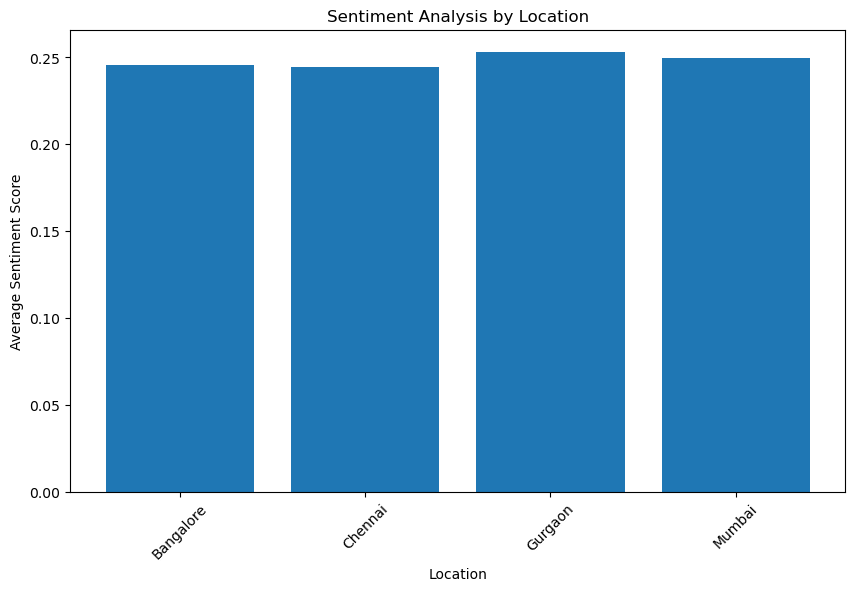

In [48]:
sentiment_by_location = data.groupby('Location')['sentiment_score'].mean().reset_index()
print(sentiment_by_location)
# Create a bar chart to visualize sentiment by location
plt.figure(figsize=(10, 6))
plt.bar(sentiment_by_location['Location'], sentiment_by_location['sentiment_score'])
plt.xlabel('Location')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Analysis by Location')
plt.xticks(rotation=45)
plt.show()

         Category  sentiment_score
0         General         0.247101
1  General Petite         0.252963
2       Initmates         0.256951


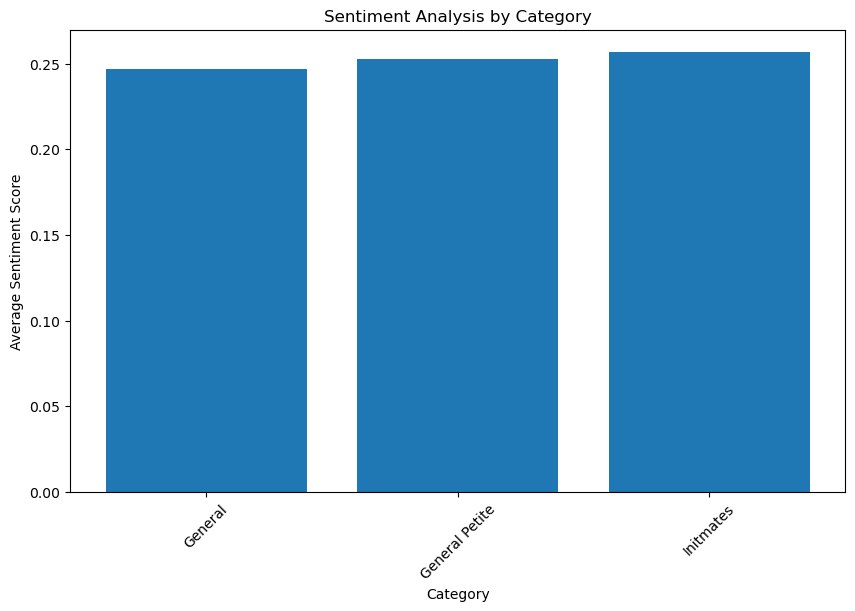

In [49]:
sentiment_by_category = data.groupby('Category')['sentiment_score'].mean().reset_index()
print(sentiment_by_category)
# Create a bar chart to visualize sentiment by location
plt.figure(figsize=(10, 6))
plt.bar(sentiment_by_category['Category'], sentiment_by_category['sentiment_score'])
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Analysis by Category')
plt.xticks(rotation=45)
plt.show()

  Subcategory1  sentiment_score
0      Bottoms         0.250308
1      Dresses         0.249919
2     Intimate         0.254538
3      Jackets         0.238686
4         Tops         0.250325
5        Trend         0.201617


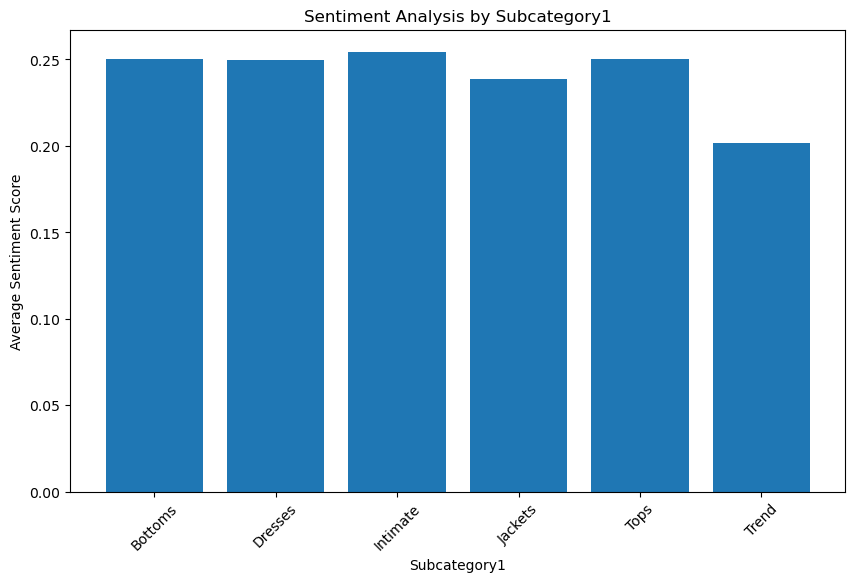

In [50]:
sentiment_by_Subcategory1 = data.groupby('Subcategory1')['sentiment_score'].mean().reset_index()
print(sentiment_by_Subcategory1)
# Create a bar chart to visualize sentiment by location
plt.figure(figsize=(10, 6))
plt.bar(sentiment_by_Subcategory1['Subcategory1'], sentiment_by_Subcategory1['sentiment_score'])
plt.xlabel('Subcategory1')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Analysis by Subcategory1')
plt.xticks(rotation=45)
plt.show()

      SubCategory2  sentiment_score
0          Blouses         0.253230
1   Casual bottoms         0.330000
2         Chemises         0.600000
3          Dresses         0.249936
4       Fine gauge         0.246506
5        Intimates         0.264075
6          Jackets         0.244589
7            Jeans         0.251557
8            Knits         0.250936
9         Layering         0.256229
10         Legwear         0.260518
11          Lounge         0.244401
12       Outerwear         0.226047
13           Pants         0.244747
14          Shorts         0.247831
15          Skirts         0.257844
16           Sleep         0.253675
17        Sweaters         0.244853
18            Swim         0.266739
19           Trend         0.201617


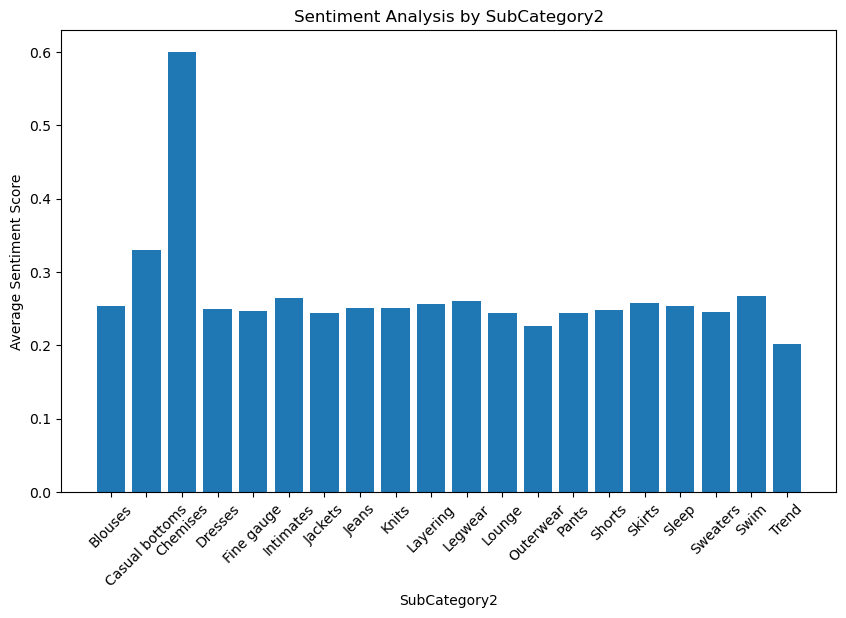

In [51]:
sentiment_by_SubCategory2 = data.groupby('SubCategory2')['sentiment_score'].mean().reset_index()
print(sentiment_by_SubCategory2)
# Create a bar chart to visualize sentiment by location
plt.figure(figsize=(10, 6))
plt.bar(sentiment_by_SubCategory2['SubCategory2'], sentiment_by_SubCategory2['sentiment_score'])
plt.xlabel('SubCategory2')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Analysis by SubCategory2')
plt.xticks(rotation=45)
plt.show()

  Channel  sentiment_score
0  Mobile         0.252499
1     Web         0.247748


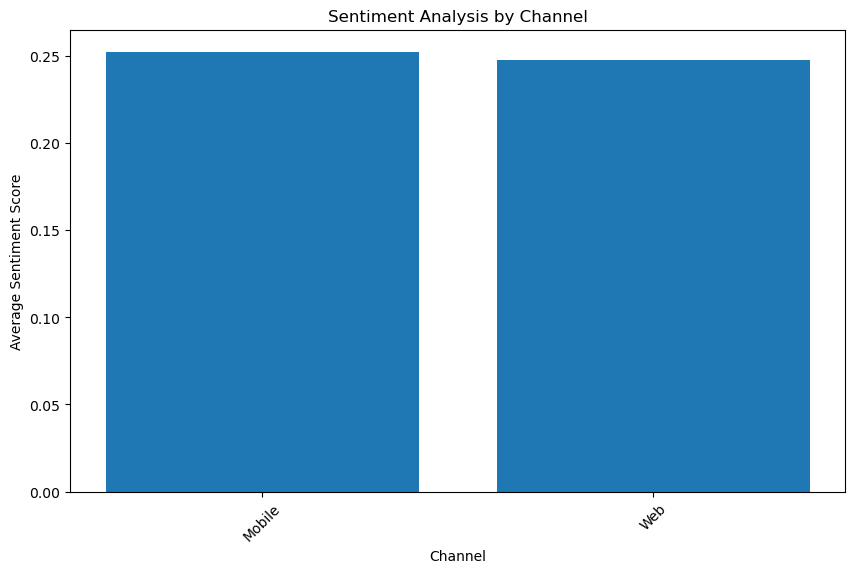

In [52]:
sentiment_by_Channel = data.groupby('Channel')['sentiment_score'].mean().reset_index()
print(sentiment_by_Channel)
# Create a bar chart to visualize sentiment by location
plt.figure(figsize=(10, 6))
plt.bar(sentiment_by_Channel['Channel'], sentiment_by_Channel['sentiment_score'])
plt.xlabel('Channel')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Analysis by Channel')
plt.xticks(rotation=45)
plt.show()

In [53]:
review_data['Customer Age'].min()

18

In [54]:
review_data['Customer Age'].max()

99

In [55]:
review_data['Age_group'] = pd.cut(review_data['Customer Age'] , [18,30,60,99], labels = ['Young', 'Middle_aged', 'Senior_citizen'])

        Age_group  sentiment_score
0           Young         0.252686
1     Middle_aged         0.248661
2  Senior_citizen         0.253798


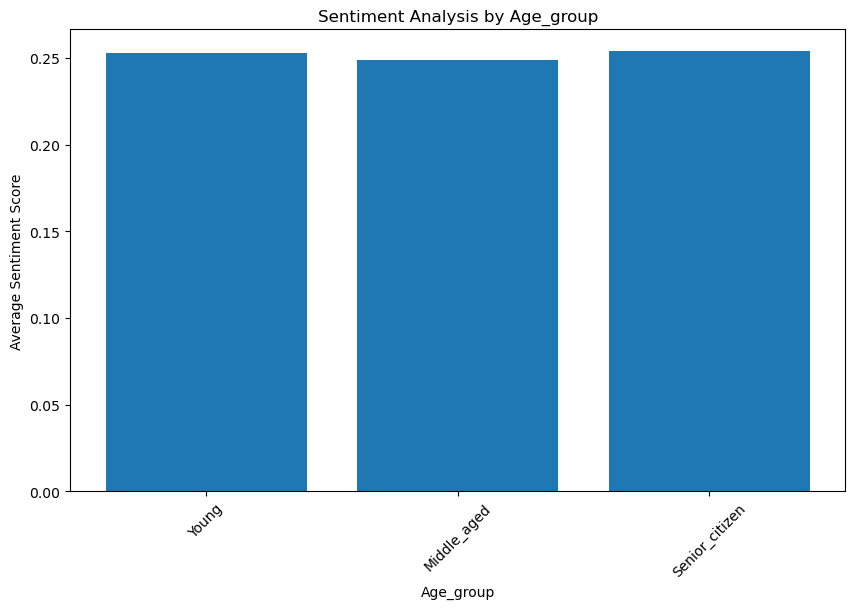

In [56]:
sentiment_by_Age_group = data.groupby('Age_group')['sentiment_score'].mean().reset_index()
print(sentiment_by_Age_group)
# Create a bar chart to visualize sentiment by location
plt.figure(figsize=(10, 6))
plt.bar(sentiment_by_Age_group['Age_group'], sentiment_by_Age_group['sentiment_score'])
plt.xlabel('Age_group')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Analysis by Age_group')
plt.xticks(rotation=45)
plt.show()

In [57]:
data.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Text', 'Rating', 'Recommend Flag',
       'count_sentence', 'count_word', 'count_unique_word', 'count_letters',
       'word_density', 'count_punctuations', 'count_words_upper',
       'count_words_lower', 'count_words_title', 'count_stopwords',
       'mean_word_len', 'numeric', 'alphanumeric', 'alphabetetics', 'Spaces',
       'words_ends_with_et', 'words_start_with_no', 'wordcounts',
       'sentiment_score', 'Age_group'],
      dtype='object')

In [58]:
data.drop(columns = ['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 
       'count_sentence', 'count_word', 'count_unique_word', 'count_letters',
       'word_density', 'count_punctuations', 'count_words_upper',
       'count_words_lower', 'count_words_title', 'count_stopwords',
       'mean_word_len', 'numeric', 'alphanumeric', 'alphabetetics', 'Spaces',
       'words_ends_with_et', 'words_start_with_no', 'wordcounts',
        'Age_group'] , inplace = True)

In [59]:
data.head()

Review Text  Rating  Recommend Flag  \
0  Absolutely wonderful - silky and sexy and comf...       4               1   
1  Love this dress!  it's sooo pretty.  i happene...       5               1   
2  I had such high hopes for this dress and reall...       3               0   
3  I love, love, love this jumpsuit. it's fun, fl...       5               1   
4  This shirt is very flattering to all due to th...       5               1   

   sentiment_score  
0         0.633333  
1         0.339583  
2         0.073675  
3         0.550000  
4         0.512891

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Review Text      22641 non-null  object 
 1   Rating           22641 non-null  int64  
 2   Recommend Flag   22641 non-null  int64  
 3   sentiment_score  22641 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 884.4+ KB


In [61]:
data['Review Text'] = data['Review Text'].astype(str)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Review Text      22641 non-null  object 
 1   Rating           22641 non-null  int64  
 2   Recommend Flag   22641 non-null  int64  
 3   sentiment_score  22641 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 884.4+ KB


In [63]:
# Define a function to assign sentiment labels
def get_sentiment_label(sentiment_score):
    if sentiment_score > 0.2:
        return "positive"
    elif sentiment_score < -0.2:
        return "negative"
    else:
        return "neutral"

In [64]:
data['sentiment_label'] = data.sentiment_score.apply(get_sentiment_label)

In [65]:
data.head()

Review Text  Rating  Recommend Flag  \
0  Absolutely wonderful - silky and sexy and comf...       4               1   
1  Love this dress!  it's sooo pretty.  i happene...       5               1   
2  I had such high hopes for this dress and reall...       3               0   
3  I love, love, love this jumpsuit. it's fun, fl...       5               1   
4  This shirt is very flattering to all due to th...       5               1   

   sentiment_score sentiment_label  
0         0.633333        positive  
1         0.339583        positive  
2         0.073675         neutral  
3         0.550000        positive  
4         0.512891        positive

In [66]:
pd.crosstab(data.Rating, data.sentiment_label)

sentiment_label  negative  neutral  positive
Rating                                      
1                      48      578       195
2                      50     1038       461
3                      34     1686      1103
4                      11     2242      2655
5                      13     3318      9209

In [67]:
negativesent_positivescore = data[((data.sentiment_label == 'negative') & (data.Rating >=4))]

In [68]:
negativesent_positivescore

Review Text  Rating  \
615    This jacket is well-made and smart looking. it...       5   
837    I ordered this in two colors, in my regular si...       4   
1163   I really wanted this. they had two size small ...       4   
2275   I had to write a review on this one because i ...       5   
3946   This dress is flattering and seems to be made ...       5   
4288   Casual comfort with style! fabric is a dream t...       5   
4338   This dress has style and a delicate balance be...       5   
5251   I got the green one. as the other reviewers co...       5   
5414   Confused and a little disappointed because the...       4   
5704   I love this shirt but have 1 issue- that darn ...       4   
5865   I have a tough time shopping for jeans because...       5   
6430   I bought the gray and it is so much prettier t...       4   
6669   I want to hate these jeans because they are so...       5   
7236                                         Comfy cozy!       4   
7447   I have been living in mine since i bought it! ...       5   
7815   I'm a size 4 all day everyday. but, these pant...       4   
13624  So disappointed! i couldn't even get it on. de...       4   
14417  This dress looks and feels classy and expensiv...       5   
15707  This dress is effortlessly chic. i wore it wit...       5   
15843  I would have bought this had it not been for t...       5   
16009  These were my go to work pants. i have 10 pair...       5   
19619  These bottoms run very small! i'm 5ft 3in and ...       4   
20140  The color was a little darker than it looks on...       4   
23091  A little treat for me. i work from home and am...       4   

       Recommend Flag  sentiment_score sentiment_label  
615                 1        -0.205357        negative  
837                 0        -0.221429        negative  
1163                0        -0.238889        negative  
2275                1        -0.250000        negative  
3946                1        -0.250000        negative  
4288                1        -0.375000        negative  
4338                1        -0.300000        negative  
5251                1        -0.275000        negative  
5414                1        -0.270153        negative  
5704                1        -0.245833        negative  
5865                1        -0.257778        negative  
6430                1        -0.319792        negative  
6669                1        -0.237500        negative  
7236                1        -0.250000        negative  
7447                1        -0.267857        negative  
7815                1        -0.350000        negative  
13624               1        -0.468750        negative  
14417               1        -0.262500        negative  
15707               1        -0.333333        negative  
15843               1        -0.700000        negative  
16009               1        -0.375000        negative  
19619               1        -0.302083        negative  
20140               1        -0.234375        negative  
23091               1        -0.522321        negative

In [69]:
text = negativesent_positivescore['Review Text'][615]

In [70]:
TextBlob(text).sentiment.polarity

-0.20535714285714285

In [71]:
Positive_review = data['Review Text'][data.Rating>=4]
Negative_review = data['Review Text'][data.Rating<3]

In [72]:
Positive_review.head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
6    I aded this in my basket at hte last mintue to...
Name: Review Text, dtype: object

In [73]:
Negative_review

5        I love tracy reese dresses, but this one is no...
22       First of all, this is not pullover styling. th...
26       I have been waiting for this sweater coat to s...
33       I ordered this 3 months ago, and it finally ca...
56       I am pregnant and i thought this would be a gr...
                               ...                        
23406    I was very excited to find a fun and lightweig...
23424    Before i ordered this i noted the other review...
23427    What drew me to this shirt was the beautiful s...
23437    This dress is so cute in the photo and fit tru...
23478    I was surprised at the positive reviews for th...
Name: Review Text, Length: 2370, dtype: object

In [74]:
stop = list(STOPWORDS)

from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    
     # Convert to lowercase
    text = text.lower()
    
    # Replace special characters and numbers with ""
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    
    # Replace double spaces with single
    text = re.sub(r"\s+", " ", text)
    
    # Remove string punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop])
    
    # Correct spelling using TextBlob
    #text = str(TextBlob(text).correct())
    
    # Stemming using PorterStemmer
    #text = " ".join([stemmer.stem(word) for word in text.split()])
    
    # Lemmatization using WordNetLemmatizer
    #text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text


In [75]:
Positive_review = Positive_review.apply(clean_text)

In [76]:
Negative_review = Negative_review.apply(clean_text)

## WordCloud for positive reviews

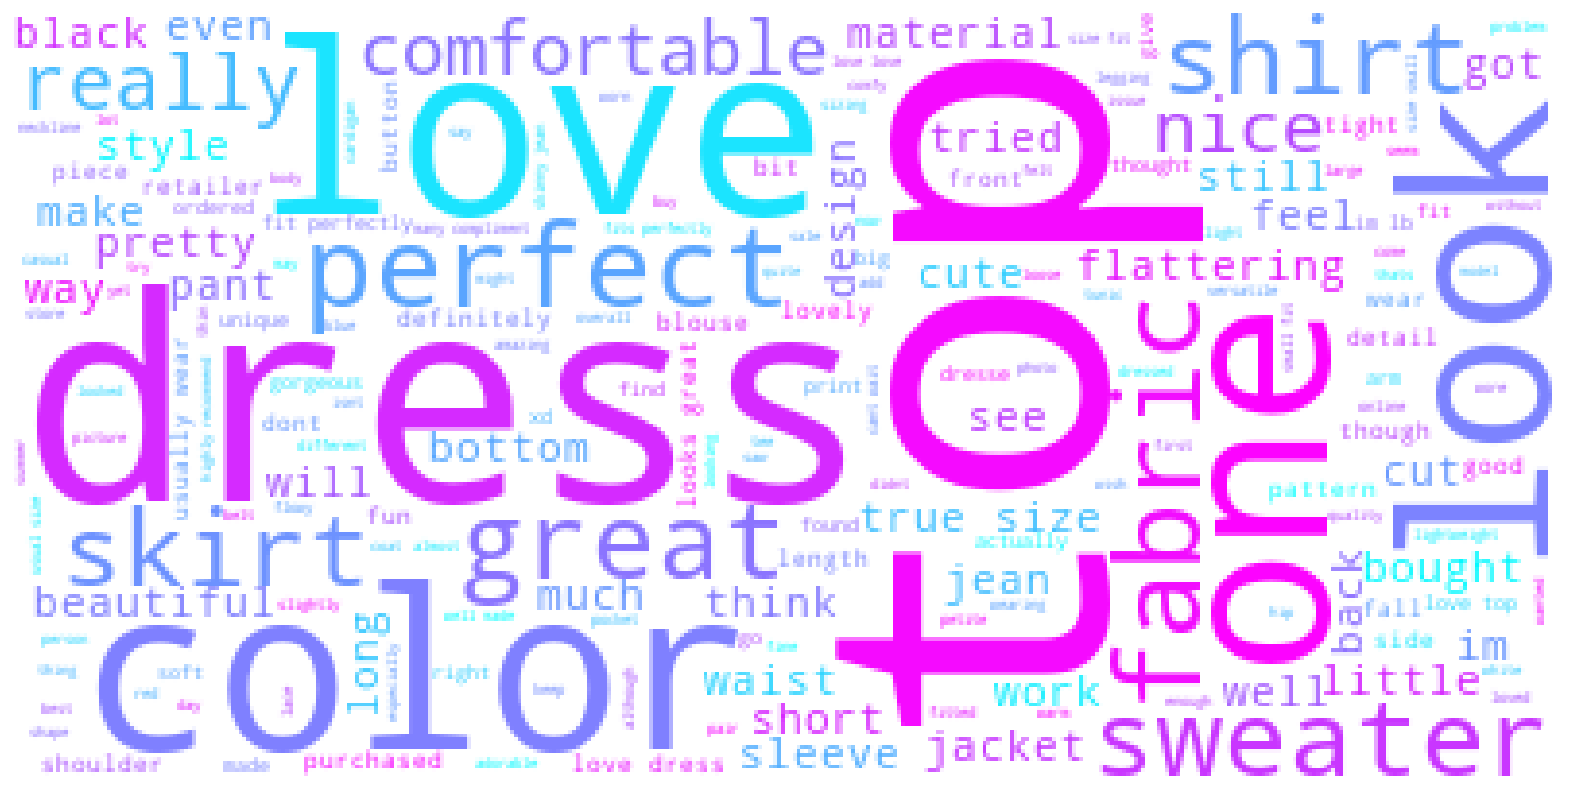

In [77]:
wordcloud = WordCloud(background_color="white", max_words =250,colormap='cool',stopwords=stop).generate(' '.join(Positive_review.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [78]:
stop.extend(['find', 'one','p'])

In [79]:
stop

['as',
 'ours',
 'what',
 'have',
 'that',
 'itself',
 'hers',
 "won't",
 "he'll",
 'else',
 "shouldn't",
 'k',
 'hence',
 "they've",
 'such',
 'more',
 "you've",
 'very',
 'then',
 'also',
 'once',
 "you'll",
 'his',
 "we've",
 "he'd",
 'at',
 'too',
 "they'd",
 'they',
 'on',
 'she',
 'each',
 'some',
 "haven't",
 'its',
 'their',
 'yourselves',
 'above',
 "hasn't",
 "where's",
 'me',
 'could',
 'below',
 'can',
 "how's",
 'there',
 'am',
 'com',
 'because',
 "she'll",
 'himself',
 'out',
 'themselves',
 'in',
 'all',
 'about',
 "we're",
 'during',
 "they're",
 'http',
 'those',
 "wouldn't",
 'but',
 'off',
 'were',
 'did',
 'your',
 'so',
 'after',
 'it',
 'other',
 "you'd",
 "i'll",
 'otherwise',
 'over',
 'had',
 "they'll",
 'doing',
 'get',
 "we'd",
 'when',
 'ever',
 'would',
 'these',
 "he's",
 'than',
 'why',
 'again',
 "let's",
 'of',
 'into',
 'through',
 'under',
 "i'm",
 "i'd",
 'has',
 "hadn't",
 'from',
 'we',
 'down',
 'or',
 'an',
 "why's",
 'here',
 "there's",
 "it's"

## WordCloud for negative reviews

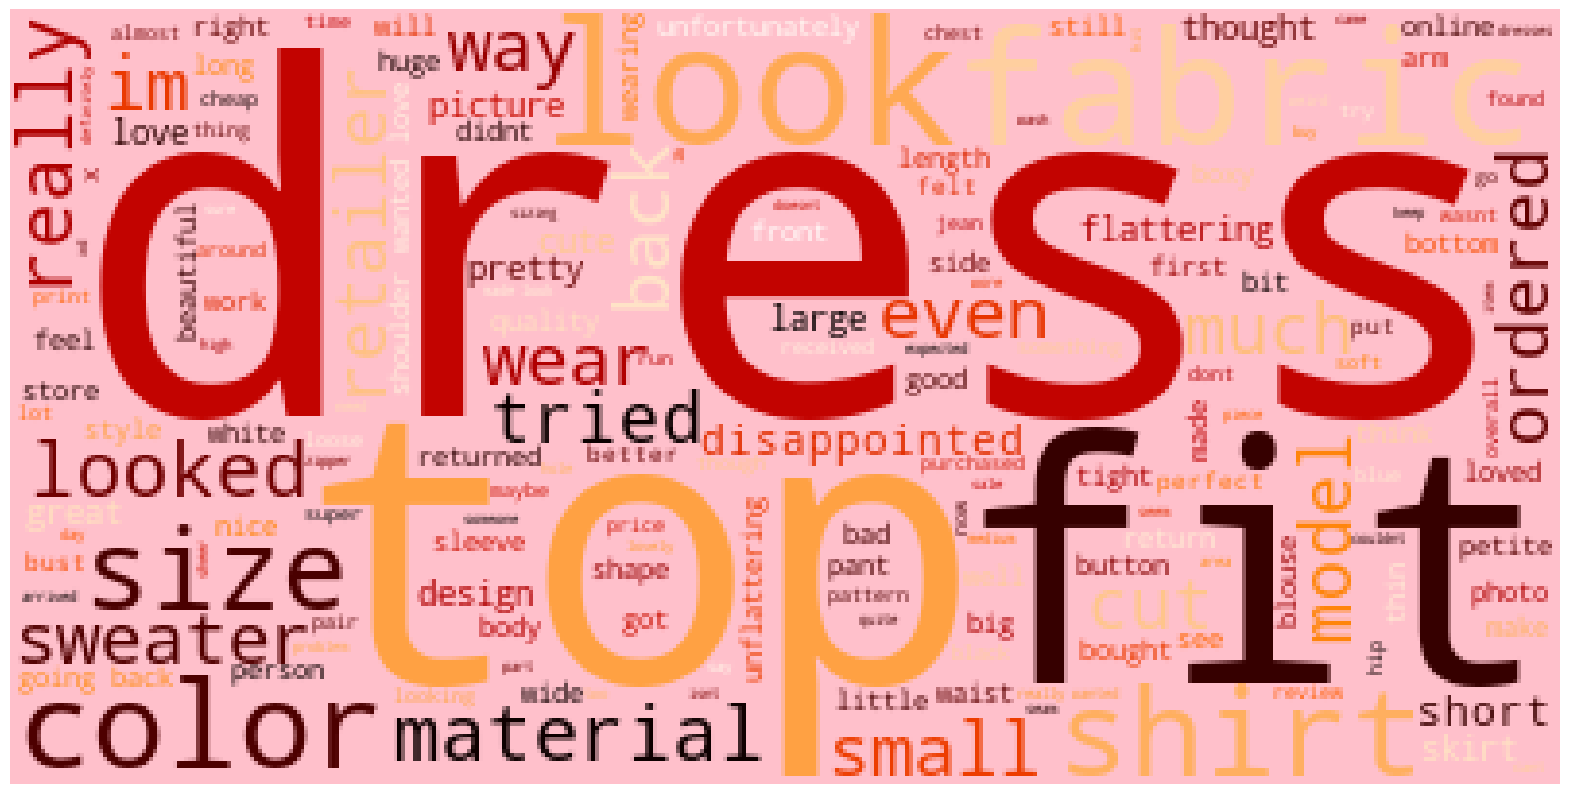

In [80]:
wordcloud = WordCloud(background_color="pink", max_words =250,colormap='gist_heat',stopwords=stop).generate(' '.join(Negative_review.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [81]:
# Count Vectorization

In [82]:

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800,
                             stop_words=stop)
Positive_review_count = count_vect.fit_transform(Positive_review)
Positive_review_dtm=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.vocabulary_.keys())

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [83]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800,
                            stop_words=stop)
Negative_review_count = count_vect.fit_transform(Negative_review)
Negative_review_dtm=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.vocabulary_.keys())

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


<AxesSubplot:>

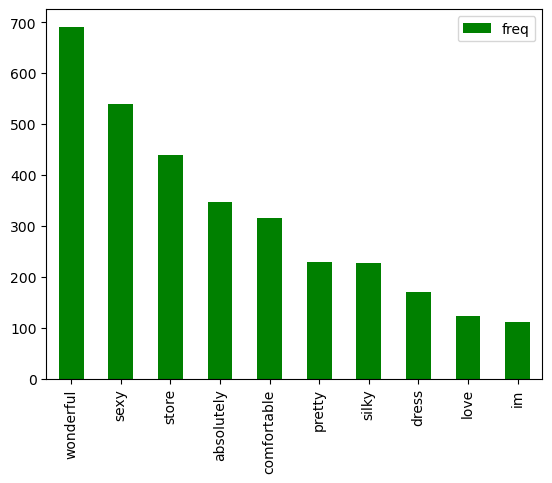

In [84]:
word_freq = pd.DataFrame(Positive_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='Green')

#fig = plt.figure(figsize=(200,50))

<AxesSubplot:>

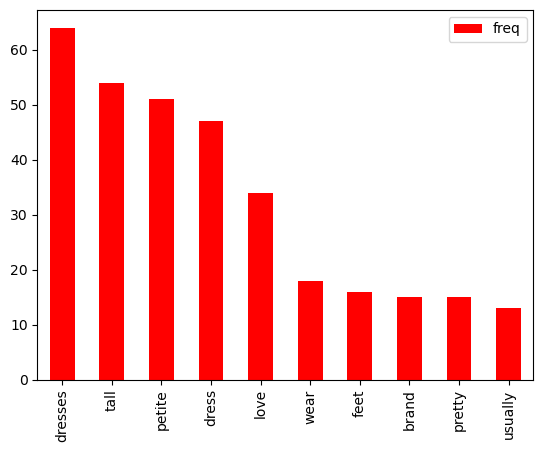

In [85]:
word_freq = pd.DataFrame(Negative_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='red')

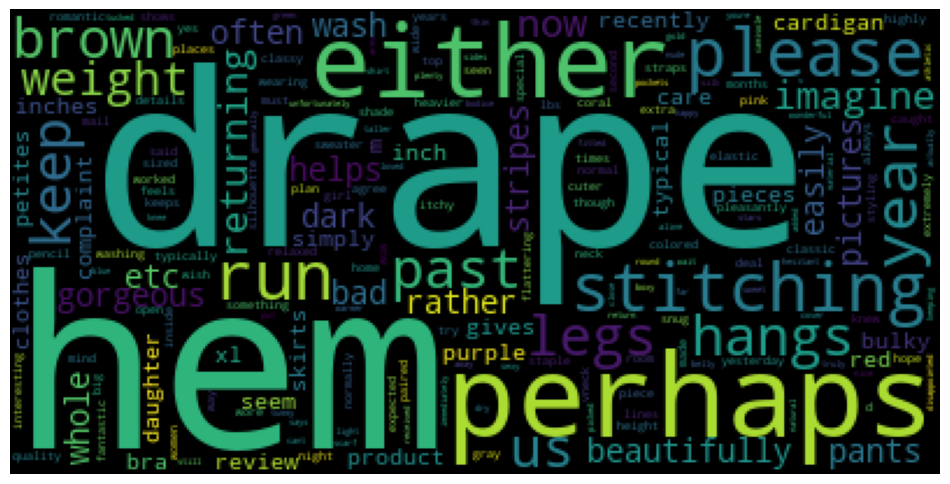

In [86]:
word_freq_dictionary = dict(Positive_review_dtm.apply(sum))

from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='black', stopwords=stop)

wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [87]:
word_freq_dictionary = dict(Negative_review_dtm.apply(sum))

In [88]:
word_freq_dictionary

{'love': 34,
 'dresses': 64,
 'petite': 51,
 'feet': 16,
 'tall': 54,
 'usually': 13,
 'wear': 18,
 'brand': 15,
 'dress': 47,
 'pretty': 15,
 'package': 44,
 'lot': 84,
 'skirt': 27,
 'long': 51,
 'full': 50,
 'small': 26,
 'frame': 16,
 'take': 18,
 'away': 73,
 'garment': 44,
 'color': 43,
 'idea': 28,
 'style': 28,
 'work': 38,
 'returned': 17,
 'first': 85,
 'styling': 71,
 'side': 30,
 'zipper': 136,
 'wouldnt': 135,
 'purchased': 86,
 'knew': 15,
 'large': 18,
 'bust': 13,
 'next': 21,
 'second': 14,
 'feels': 48,
 'looks': 60,
 'cheap': 55,
 'slip': 31,
 'awkward': 14,
 'tight': 606,
 'shape': 119,
 'underneath': 49,
 'sadly': 35,
 'will': 27,
 'returning': 47,
 'im': 36,
 'sure': 14,
 'something': 16,
 'exchange': 15,
 'sweater': 13,
 'coat': 235,
 'excited': 15,
 'true': 27,
 'size': 18,
 'made': 33,
 'look': 19,
 'short': 135,
 'sleeves': 13,
 'wide': 15,
 'although': 228,
 'light': 31,
 'weight': 14,
 'fall': 136,
 'dont': 103,
 'need': 105,
 'much': 113,
 'buttons': 17,
 '

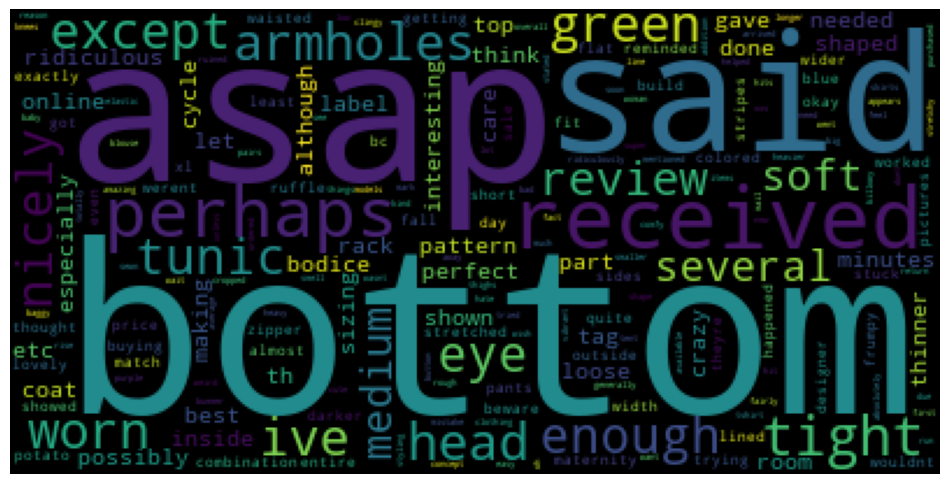

In [89]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='black', stopwords=stop)

wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Classification model for Recommendation prediction

In [90]:
data.head()

Review Text  Rating  Recommend Flag  \
0  Absolutely wonderful - silky and sexy and comf...       4               1   
1  Love this dress!  it's sooo pretty.  i happene...       5               1   
2  I had such high hopes for this dress and reall...       3               0   
3  I love, love, love this jumpsuit. it's fun, fl...       5               1   
4  This shirt is very flattering to all due to th...       5               1   

   sentiment_score sentiment_label  
0         0.633333        positive  
1         0.339583        positive  
2         0.073675         neutral  
3         0.550000        positive  
4         0.512891        positive

In [91]:
X = data["Review Text"]
y= data["Recommend Flag"]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [93]:
X_train.head()

1222     This is a beautiful sweater -- soft, lovely co...
15835    I am very surprised by the low reviews of this...
6000     I bought this in blue and love it. i usually w...
13404    This dress runs a bit small. the large arm hol...
9098     I have an hourglass shape and this dress is a ...
Name: Review Text, dtype: object

In [94]:
X_train = X_train.apply(clean_text)

In [95]:
X_test = X_test.apply(clean_text)

# Vectorization

## Count vectorizer

In [96]:
vect = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
                       lowercase=True, 
                       ngram_range=(1,1),
                       max_features=5000,
                       stop_words=stop)

In [97]:
X_train_count = vect.fit_transform(X_train)
X_test_count = vect.transform(X_test)

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [98]:
type(X_train_count)

scipy.sparse._csr.csr_matrix

In [99]:
X_train_count.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [100]:
vect.get_feature_names_out()

array(['aa', 'ab', 'abdomen', ..., 'zips', 'zone', 'zoom'], dtype=object)

In [101]:
pd.DataFrame(X_train_count.toarray(), columns = vect.get_feature_names_out())

aa  ab  abdomen  ability  able  absolute  absolutely  abstract  abt  \
0       0   0        0        0     0         0           0         0    0   
1       0   0        0        0     0         0           0         0    0   
2       0   0        0        0     0         0           0         0    0   
3       0   0        0        0     0         0           0         0    0   
4       0   0        0        0     0         0           0         0    0   
...    ..  ..      ...      ...   ...       ...         ...       ...  ...   
18107   0   0        0        0     0         0           0         0    0   
18108   0   0        0        0     0         0           0         0    0   
18109   0   0        0        0     0         0           0         0    0   
18110   0   0        0        0     0         0           0         0    0   
18111   0   0        0        0     0         0           0         0    0   

       abundance  ...  zero  zip  zipped  zipper  zippered  zippers  zipping  \
0              0  ...     0    0       0       0         0        0        0   
1              0  ...     0    0       0       0         0        0        0   
2              0  ...     0    0       0       0         0        0        0   
3              0  ...     0    0       0       0         0        0        0   
4              0  ...     0    0       0       0         0        0        0   
...          ...  ...   ...  ...     ...     ...       ...      ...      ...   
18107          0  ...     0    0       0       0         0        0        0   
18108          0  ...     0    0       0       0         0        0        0   
18109          0  ...     0    0       0       0         0        0        0   
18110          0  ...     0    0       0       0         0        0        0   
18111          0  ...     0    0       0       0         0        0        0   

       zips  zone  zoom  
0         0     0     0  
1         0     0     0  
2         0     0     0  
3         0     0     0  
4         0     0     0  
...     ...   ...   ...  
18107     0     0     0  
18108     0     0     0  
18109     0     0     0  
18110     0     0     0  
18111     0     0     0  

[18112 rows x 5000 columns]

## TFIDF vectorization

In [102]:
tf_idf_vectorizer = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=4000)

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [103]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [104]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

aa   ab  abdomen  ability  able  absolute  absolutely  abstract  abt  \
0      0.0  0.0      0.0      0.0   0.0       0.0         0.0       0.0  0.0   
1      0.0  0.0      0.0      0.0   0.0       0.0         0.0       0.0  0.0   
2      0.0  0.0      0.0      0.0   0.0       0.0         0.0       0.0  0.0   
3      0.0  0.0      0.0      0.0   0.0       0.0         0.0       0.0  0.0   
4      0.0  0.0      0.0      0.0   0.0       0.0         0.0       0.0  0.0   
...    ...  ...      ...      ...   ...       ...         ...       ...  ...   
18107  0.0  0.0      0.0      0.0   0.0       0.0         0.0       0.0  0.0   
18108  0.0  0.0      0.0      0.0   0.0       0.0         0.0       0.0  0.0   
18109  0.0  0.0      0.0      0.0   0.0       0.0         0.0       0.0  0.0   
18110  0.0  0.0      0.0      0.0   0.0       0.0         0.0       0.0  0.0   
18111  0.0  0.0      0.0      0.0   0.0       0.0         0.0       0.0  0.0   

       abundance  ...  zero  zip  zipped  zipper  zippered  zippers  zipping  \
0            0.0  ...   0.0  0.0     0.0     0.0       0.0      0.0      0.0   
1            0.0  ...   0.0  0.0     0.0     0.0       0.0      0.0      0.0   
2            0.0  ...   0.0  0.0     0.0     0.0       0.0      0.0      0.0   
3            0.0  ...   0.0  0.0     0.0     0.0       0.0      0.0      0.0   
4            0.0  ...   0.0  0.0     0.0     0.0       0.0      0.0      0.0   
...          ...  ...   ...  ...     ...     ...       ...      ...      ...   
18107        0.0  ...   0.0  0.0     0.0     0.0       0.0      0.0      0.0   
18108        0.0  ...   0.0  0.0     0.0     0.0       0.0      0.0      0.0   
18109        0.0  ...   0.0  0.0     0.0     0.0       0.0      0.0      0.0   
18110        0.0  ...   0.0  0.0     0.0     0.0       0.0      0.0      0.0   
18111        0.0  ...   0.0  0.0     0.0     0.0       0.0      0.0      0.0   

       zips  zone  zoom  
0       0.0   0.0   0.0  
1       0.0   0.0   0.0  
2       0.0   0.0   0.0  
3       0.0   0.0   0.0  
4       0.0   0.0   0.0  
...     ...   ...   ...  
18107   0.0   0.0   0.0  
18108   0.0   0.0   0.0  
18109   0.0   0.0   0.0  
18110   0.0   0.0   0.0  
18111   0.0   0.0   0.0  

[18112 rows x 4000 columns]

In [105]:
def eval(model, X_train, X_test):
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    print("Test_Set")
    print(classification_report(y_test, y_pred))

## Logistic Regression with count vectorizer

In [106]:
from sklearn.metrics import confusion_matrix,classification_report

In [107]:
logit = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
logit.fit(X_train_count,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [108]:
print("LOGIT MODEL")

eval(logit, X_train_count, X_test_count)

LOGIT MODEL
Train_Set
              precision    recall  f1-score   support

           0       0.72      0.96      0.83      3281
           1       0.99      0.92      0.95     14831

    accuracy                           0.93     18112
   macro avg       0.86      0.94      0.89     18112
weighted avg       0.94      0.93      0.93     18112

Test_Set
              precision    recall  f1-score   support

           0       0.61      0.79      0.69       820
           1       0.95      0.89      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.84      0.80      4529
weighted avg       0.89      0.87      0.88      4529



## Logistic Regression With TF-IDF Vectorizer

In [109]:
logit = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

logit.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [110]:
print("LOGIT MODEL")

eval(logit, X_train_tf_idf, X_test_tf_idf)

LOGIT MODEL
Train_Set
              precision    recall  f1-score   support

           0       0.57      0.89      0.70      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112

Test_Set
              precision    recall  f1-score   support

           0       0.56      0.86      0.68       820
           1       0.96      0.85      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.86      4529



# Naive Bayes

## Naive Bayes With Count Vectorizor

In [111]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [112]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

In [113]:
print("NB MODEL")

eval(nb, X_train_count, X_test_count)

NB MODEL
Train_Set
              precision    recall  f1-score   support

           0       0.69      0.83      0.75      3281
           1       0.96      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.85     18112
weighted avg       0.91      0.90      0.91     18112

Test_Set
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.81      0.83      0.82      4529
weighted avg       0.89      0.89      0.89      4529



## Naive Bayes With TF-IDF Vectorizor

In [114]:
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

In [115]:
print("NB MODEL")

eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
Train_Set
              precision    recall  f1-score   support

           0       0.92      0.29      0.44      3281
           1       0.86      0.99      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.89      0.64      0.68     18112
weighted avg       0.87      0.87      0.84     18112

Test_Set
              precision    recall  f1-score   support

           0       0.88      0.20      0.33       820
           1       0.85      0.99      0.92      3709

    accuracy                           0.85      4529
   macro avg       0.86      0.60      0.62      4529
weighted avg       0.85      0.85      0.81      4529



## Support Vector Machine (SVM)

## Support Vector Machine (SVM) With Count Vectorizor

In [116]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [117]:
print("SVC MODEL")

eval(svc, X_train_count, X_test_count)

SVC MODEL
Train_Set
              precision    recall  f1-score   support

           0       0.65      0.93      0.77      3281
           1       0.98      0.89      0.93     14831

    accuracy                           0.90     18112
   macro avg       0.82      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112

Test_Set
              precision    recall  f1-score   support

           0       0.60      0.82      0.69       820
           1       0.96      0.88      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.85      0.81      4529
weighted avg       0.89      0.87      0.88      4529



## Support Vector Machine (SVM) With TF-IDF Vectorizer

In [118]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)

svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [119]:
print("SVC MODEL")

eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
Train_Set
              precision    recall  f1-score   support

           0       0.57      0.89      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112

Test_Set
              precision    recall  f1-score   support

           0       0.55      0.86      0.67       820
           1       0.96      0.85      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.86      4529



## Ramdom Forest

## RF with Count Vectorizer

In [120]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [121]:
print("RF MODEL")

eval(rf, X_train_count, X_test_count)

RF MODEL
Train_Set
              precision    recall  f1-score   support

           0       0.61      0.88      0.72      3281
           1       0.97      0.87      0.92     14831

    accuracy                           0.88     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.91      0.88      0.88     18112

Test_Set
              precision    recall  f1-score   support

           0       0.55      0.79      0.65       820
           1       0.95      0.86      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.75      0.83      0.78      4529
weighted avg       0.88      0.85      0.86      4529



## RF with TF-IDF Vectorizer

In [122]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")

rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [123]:
print("RF MODEL")

eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
Train_Set
              precision    recall  f1-score   support

           0       0.57      0.89      0.70      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112

Test_Set
              precision    recall  f1-score   support

           0       0.51      0.79      0.62       820
           1       0.95      0.83      0.89      3709

    accuracy                           0.82      4529
   macro avg       0.73      0.81      0.75      4529
weighted avg       0.87      0.82      0.84      4529



## AdaBoost

## Ada Boost with count vectorizer

In [124]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [125]:
print("Ada MODEL")

eval(ada, X_train_count, X_test_count)

Ada MODEL
Train_Set
              precision    recall  f1-score   support

           0       0.80      0.65      0.72      3281
           1       0.93      0.96      0.94     14831

    accuracy                           0.91     18112
   macro avg       0.86      0.81      0.83     18112
weighted avg       0.90      0.91      0.90     18112

Test_Set
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.82      0.77      0.79      4529
weighted avg       0.88      0.89      0.88      4529



## Ada Boost with TF-IDF vectorizer

In [126]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)

ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [127]:
print("Ada MODEL")

eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
Train_Set
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      3281
           1       0.94      0.97      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.88      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112

Test_Set
              precision    recall  f1-score   support

           0       0.72      0.59      0.65       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.82      0.77      0.79      4529
weighted avg       0.88      0.88      0.88      4529



## Comparing the models

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compare_models(models, X_train, y_train, X_test, y_test):
    model_names = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for model in models:
        model_names.append(model.__class__.__name__)  # Get the model name
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions on the test set

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Create a DataFrame to display the results
    results_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracy_scores,
        'Precision': precision_scores,
        'Recall': recall_scores,
        'F1 Score': f1_scores
    })

    # Display the results in tabular form
    print(results_df)

    # Create a bar chart to visualize the results
    plt.figure(figsize=(12, 6))
    plt.barh(model_names, accuracy_scores, color='blue', label='Accuracy')
    plt.barh(model_names, precision_scores, color='green', label='Precision')
    plt.barh(model_names, recall_scores, color='coral', label='Recall')
    plt.barh(model_names, f1_scores, color='magenta', label='F1 Score')

    plt.xlabel('Metric Score')
    plt.title('Model Comparison')
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()




                    Model  Accuracy  Precision    Recall  F1 Score
0      LogisticRegression  0.850960   0.890995  0.850960  0.862110
1           MultinomialNB  0.850519   0.854559  0.850519  0.809638
2               LinearSVC  0.849415   0.889942  0.849415  0.860730
3  RandomForestClassifier  0.824244   0.867932  0.824244  0.837529
4      AdaBoostClassifier  0.884964   0.878813  0.884964  0.880488


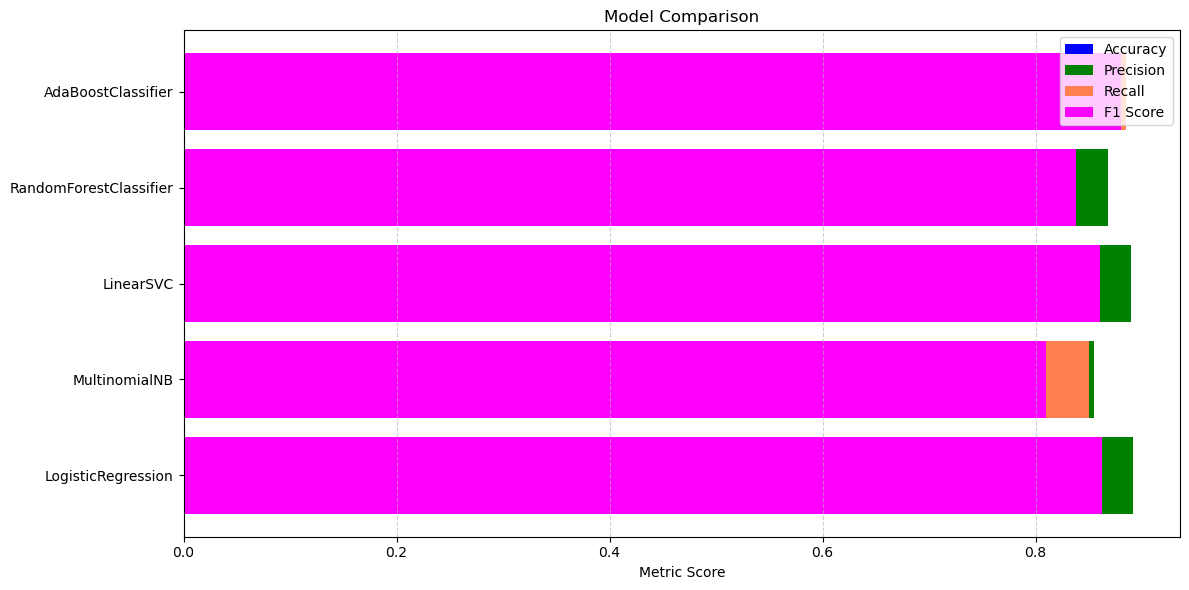

In [129]:
models_to_compare = [logit, nb, svc, rf, ada]

# Call the function to compare the models
compare_models(models_to_compare, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

## From the above evaluation of the models we found that AdaBoost Classifier appears to be a strong model.

# Topic Mining - Intent Analysis - LDA (Latent Dirichlet allocation)

In [130]:
data

Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommend Flag  sentiment_score sentiment_label  
0                   1         0.633333        positive  
1                   1         0.339583        positive  
2                   0         0.073675         neutral  
3                   1         0.550000        positive  
4                   1         0.512891        positive  
...               ...              ...             ...  
23481               1         0.552667        positive  
23482               1         0.091667         neutral  
23483               0         0.414286        positive  
23484               1         0.322222        positive  
23485               1         0.413889        positive  

[22641 rows x 5 columns]

##  Topic Mining

In [131]:
# Importing Gensim
import gensim
from gensim import corpora

In [132]:
X_train

1222     beautiful sweater soft lovely color easy wear ...
15835    surprised low reviews dress dress obviously lo...
6000     bought blue love usually wear xs small retaile...
13404    dress runs bit small large arm holes unflatter...
9098     hourglass shape dress good fit think dress loo...
                               ...                        
2856     ruffle sweet detail might basic rather boxy sh...
15894    purchased blue white pattern shirt color blue ...
17118    sweater came expected adorable others said sof...
18345    top flattering im medium build m bulky fabric ...
2697     top totally adorable favorite retailer tops se...
Name: Review Text, Length: 18112, dtype: object

In [133]:
X_train_tokens = [doc.split() for doc in X_train]  

In [134]:
X_train_tokens

[['beautiful',
  'sweater',
  'soft',
  'lovely',
  'color',
  'easy',
  'wear',
  'current',
  'photo',
  'true',
  'length',
  'pounds',
  'ordered',
  'regular',
  'sm',
  'fits',
  'hips'],
 ['surprised',
  'low',
  'reviews',
  'dress',
  'dress',
  'obviously',
  'loose',
  'fitting',
  'style',
  'bit',
  'man',
  'repellar',
  'dressthe',
  'quality',
  'fabric',
  'beautiful',
  'pattern',
  'stunning',
  'loose',
  'flowy',
  'style',
  'liberating',
  'comfortable',
  'love',
  'otk',
  'boots',
  'tights',
  'winter',
  'planning',
  'wear',
  'sandals',
  'spring',
  'lbs',
  'purchased',
  'petite',
  'small'],
 ['bought',
  'blue',
  'love',
  'usually',
  'wear',
  'xs',
  'small',
  'retailer',
  'shirts',
  'small',
  'medium',
  'dresses',
  'ended',
  'extra',
  'small',
  'petite',
  'really',
  'flattering',
  'hides',
  'stomach',
  'enough',
  'highly',
  'recommend',
  'dress',
  'size',
  'way'],
 ['dress',
  'runs',
  'bit',
  'small',
  'large',
  'arm',
  '

In [135]:
dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)


Dictionary(16708 unique tokens: ['beautiful', 'color', 'current', 'easy', 'fits']...)


In [136]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]

In [137]:
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(0, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 1)],
 [(16, 1),
  (20, 1),
  (28, 1),
  (34, 1),
  (41, 3),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1)],
 [(17, 1),
  (20, 4),
  (41, 2),
  (54, 1),
  (63, 1),
  (65, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 

In [138]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [139]:
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(0, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 1)],
 [(16, 1),
  (20, 1),
  (28, 1),
  (34, 1),
  (41, 3),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1)],
 [(17, 1),
  (20, 4),
  (41, 2),
  (54, 1),
  (63, 1),
  (65, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 

In [140]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=15, id2word = dictionary)

In [141]:
print(ldamodel.log_perplexity(doc_term_matrix))

-7.9829587139980385


In [142]:
print(ldamodel.print_topics(num_topics=10, num_words=20))

[(3, '0.019*"shirt" + 0.016*"look" + 0.015*"love" + 0.014*"cute" + 0.013*"top" + 0.013*"dress" + 0.012*"little" + 0.011*"fit" + 0.010*"nice" + 0.010*"good" + 0.009*"color" + 0.009*"comfortable" + 0.009*"bit" + 0.008*"really" + 0.008*"wear" + 0.008*"casual" + 0.008*"size" + 0.008*"back" + 0.008*"looks" + 0.008*"think"'), (10, '0.029*"compliments" + 0.019*"wore" + 0.017*"received" + 0.016*"many" + 0.015*"ive" + 0.013*"bought" + 0.013*"washed" + 0.012*"wear" + 0.011*"time" + 0.011*"love" + 0.010*"got" + 0.009*"dress" + 0.009*"white" + 0.008*"first" + 0.008*"times" + 0.008*"every" + 0.008*"dry" + 0.007*"top" + 0.007*"day" + 0.007*"gotten"'), (1, '0.043*"jeans" + 0.015*"vest" + 0.014*"pair" + 0.014*"fit" + 0.013*"skinny" + 0.013*"love" + 0.012*"perfect" + 0.012*"suit" + 0.010*"pockets" + 0.010*"wear" + 0.010*"theyre" + 0.010*"comfortable" + 0.009*"stretch" + 0.008*"soft" + 0.007*"im" + 0.007*"impossible" + 0.007*"lacy" + 0.007*"rides" + 0.007*"right" + 0.007*"amount"'), (4, '0.040*"love" + 

In [143]:
topics = ldamodel.show_topics(formatted=False, num_words=20)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,20))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 20 words:
fabric skirt love top great fit wear dress nice bit looks length material will flattering size colors swing little small

Topic 2, top 20 words:
love sweater size color true soft perfect great wear green will long bought colors super fit top large cozy fits

Topic 3, top 20 words:
great love dressed tee shirt top well fit purchase worth soft price colors dress goes fits flattering nice back versatile

Topic 4, top 20 words:
dress look love looked slip even much buttons price tried colors wearing arrived didnt online fit im fabric purchased person

Topic 5, top 20 words:
dress look fit didnt much love tried ordered really color way waist work petite size im back online beautiful wanted

Topic 6, top 20 words:
fabric top really color love look back much blouse shirt pink flattering nice made material looks quality will think thin

Topic 7, top 20 words:
compliments wore received many ive bought washed wear time love got dress white first times every dry top day go

In [144]:
# printing the topic associaltions with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 [(4, 0.41171658), (6, 0.21580754), (7, 0.15533225), (12, 0.17638849)]
doc :  1 [(2, 0.34214535), (4, 0.055814844), (10, 0.23407474), (12, 0.3463804)]
doc :  2 [(2, 0.7309772), (7, 0.23691846)]
doc :  3 [(2, 0.32803804), (14, 0.6430671)]
doc :  4 [(5, 0.16071467), (10, 0.080565035), (11, 0.2977548), (14, 0.42021912)]
doc :  5 [(1, 0.04555203), (10, 0.93163604)]
doc :  6 [(0, 0.53811985), (9, 0.38308957)]
doc :  7 [(1, 0.062145878), (3, 0.535473), (6, 0.054856755), (14, 0.32298434)]
doc :  8 [(1, 0.43387657), (3, 0.31532434), (12, 0.16993284), (13, 0.06380815)]
doc :  9 [(2, 0.77925175), (14, 0.17259589)]
doc :  10 [(0, 0.06848748), (3, 0.5371279), (4, 0.09648851), (7, 0.2799926)]
doc :  11 [(3, 0.2787698), (8, 0.079058476), (14, 0.6179173)]
doc :  12 [(12, 0.3118289), (14, 0.62149805)]
doc :  13 [(4, 0.42487), (11, 0.09612847), (13, 0.2615621), (14, 0.20113866)]
doc :  14 [(3, 0.069837496), (7, 0.6999132), (10, 0.07356223), (11, 0.09467327), (14, 0.044891227)]
doc :  15 [(2, 0.

doc :  252 [(2, 0.42347768), (4, 0.45404553), (9, 0.096663214)]
doc :  253 [(2, 0.17810772), (4, 0.017623788), (6, 0.097275555), (8, 0.094917275), (10, 0.16593423), (14, 0.43337047)]
doc :  254 [(1, 0.029433295), (2, 0.17459187), (3, 0.09843146), (6, 0.061586734), (9, 0.12997107), (11, 0.31811842), (12, 0.09663452), (13, 0.080373235)]
doc :  255 [(0, 0.93782777)]
doc :  256 [(2, 0.3422021), (10, 0.13742574), (12, 0.46322292)]
doc :  257 [(9, 0.4926006), (10, 0.44960803)]
doc :  258 [(12, 0.89627767)]
doc :  259 [(2, 0.20825367), (6, 0.10789149), (9, 0.43449116), (10, 0.10470873), (11, 0.1304677)]
doc :  260 [(2, 0.25404814), (6, 0.16366144), (7, 0.23149204), (12, 0.33093965)]
doc :  261 [(13, 0.9222087)]
doc :  262 [(1, 0.48724595), (5, 0.2375376), (7, 0.056751486), (12, 0.19915903)]
doc :  263 [(9, 0.6656088), (14, 0.24771295)]
doc :  264 [(3, 0.9066578)]
doc :  265 [(0, 0.09119034), (7, 0.2987594), (10, 0.1570338), (12, 0.20835127), (13, 0.23076993)]
doc :  266 [(9, 0.35015705), (10,

doc :  678 [(0, 0.17771883), (3, 0.77412814)]
doc :  679 [(1, 0.119928956), (3, 0.15129465), (5, 0.09535775), (8, 0.32560024), (9, 0.061120246), (14, 0.2180822)]
doc :  680 [(0, 0.09554119), (5, 0.18127891), (9, 0.5088817), (12, 0.17899957)]
doc :  681 [(10, 0.9555512)]
doc :  682 [(2, 0.47317892), (13, 0.4834808)]
doc :  683 [(4, 0.3070081), (9, 0.1507448), (13, 0.4280037)]
doc :  684 [(1, 0.6058358), (3, 0.19337997), (4, 0.09392695), (5, 0.08065989)]
doc :  685 [(9, 0.31151155), (12, 0.63070685)]
doc :  686 [(0, 0.1692147), (9, 0.21166077), (12, 0.3517826), (13, 0.24114339)]
doc :  687 [(1, 0.44052202), (2, 0.20203711), (5, 0.043698594), (9, 0.28929752)]
doc :  688 [(2, 0.38481542), (3, 0.31833678), (7, 0.13750191), (10, 0.059221607), (13, 0.08385464)]
doc :  689 [(3, 0.8176305), (5, 0.044295765), (12, 0.112259716)]
doc :  690 [(0, 0.29733005), (5, 0.38042507), (7, 0.07401547), (10, 0.22599986)]
doc :  691 [(0, 0.077728674), (7, 0.045025345), (13, 0.8543922)]
doc :  692 [(4, 0.379014

doc :  1175 [(1, 0.8151175), (3, 0.046236023), (6, 0.11759317)]
doc :  1176 [(0, 0.092678025), (4, 0.18760736), (7, 0.23410526), (9, 0.43014592), (13, 0.039583217)]
doc :  1177 [(2, 0.12948795), (3, 0.49335134), (9, 0.15056795), (12, 0.15370168), (13, 0.05737511)]
doc :  1178 [(0, 0.25225747), (1, 0.50492024), (7, 0.21614578)]
doc :  1179 [(4, 0.60172725), (12, 0.32603857)]
doc :  1180 [(0, 0.04442776), (1, 0.12506488), (3, 0.24915981), (12, 0.086781494), (13, 0.27943385), (14, 0.20082702)]
doc :  1181 [(3, 0.31144395), (4, 0.57912976), (10, 0.069392085)]
doc :  1182 [(1, 0.16857085), (5, 0.42818847), (9, 0.065737575), (10, 0.21738261), (14, 0.10624743)]
doc :  1183 [(3, 0.5016296), (4, 0.296056), (13, 0.1841291)]
doc :  1184 [(2, 0.45733294), (5, 0.2489847), (11, 0.22700544)]
doc :  1185 [(2, 0.2655778), (6, 0.27319762), (7, 0.14235424), (12, 0.20946589), (14, 0.089138485)]
doc :  1186 [(14, 0.9533415)]
doc :  1187 [(1, 0.13455403), (12, 0.37038368), (13, 0.44171426)]
doc :  1188 [(4,

doc :  1516 [(2, 0.43419003), (11, 0.52969486)]
doc :  1517 [(5, 0.3056984), (9, 0.06600708), (13, 0.5267086), (14, 0.076277114)]
doc :  1518 [(0, 0.059287295), (1, 0.10141095), (2, 0.56856966), (10, 0.079053506), (13, 0.13824846), (14, 0.04142566)]
doc :  1519 [(4, 0.54420054), (6, 0.38912237)]
doc :  1520 [(1, 0.080964476), (2, 0.45464757), (5, 0.36759523), (10, 0.0801225)]
doc :  1521 [(1, 0.21468313), (2, 0.2042863), (10, 0.5567958)]
doc :  1522 [(1, 0.094959855), (2, 0.34562358), (3, 0.39342746), (11, 0.13410266)]
doc :  1523 [(1, 0.3002466), (7, 0.36405364), (8, 0.105962574), (9, 0.18388398)]
doc :  1524 [(6, 0.18282382), (13, 0.73048395)]
doc :  1525 [(1, 0.14090078), (3, 0.51817214), (12, 0.29092467)]
doc :  1526 [(0, 0.16107671), (2, 0.24324822), (8, 0.5575885)]
doc :  1527 [(0, 0.30729404), (2, 0.033655792), (4, 0.6399979)]
doc :  1528 [(2, 0.28267232), (6, 0.6121958), (14, 0.08271763)]
doc :  1529 [(2, 0.23187383), (3, 0.14641744), (9, 0.34116393), (12, 0.12093009), (13, 0.0

doc :  1764 [(4, 0.93331087)]
doc :  1765 [(0, 0.30498388), (2, 0.44948065), (5, 0.051732436), (7, 0.09412607), (14, 0.0860615)]
doc :  1766 [(2, 0.30827594), (5, 0.06852922), (11, 0.26962832), (13, 0.33199003)]
doc :  1767 [(3, 0.14219147), (4, 0.11715285), (11, 0.5200832), (12, 0.18380935)]
doc :  1768 [(0, 0.18929175), (2, 0.6499962), (6, 0.11068089)]
doc :  1769 [(4, 0.8962924)]
doc :  1770 [(0, 0.53242296), (6, 0.3887863)]
doc :  1771 [(2, 0.58807164), (3, 0.10431551), (4, 0.040066913), (6, 0.17142741), (7, 0.052677594), (10, 0.029148165)]
doc :  1772 [(5, 0.23260054), (11, 0.03709984), (13, 0.711626)]
doc :  1773 [(0, 0.080643564), (6, 0.12807058), (10, 0.14859411), (11, 0.12273282), (13, 0.49772695)]
doc :  1774 [(3, 0.28441963), (4, 0.12649375), (7, 0.11369853), (11, 0.46041793)]
doc :  1775 [(1, 0.16906561), (6, 0.6770801), (8, 0.092312135)]
doc :  1776 [(0, 0.2051182), (2, 0.40910724), (12, 0.34352776)]
doc :  1777 [(2, 0.3741639), (4, 0.42994374), (11, 0.16388977)]
doc :  17

doc :  2008 [(2, 0.2061405), (13, 0.31297928), (14, 0.44083917)]
doc :  2009 [(0, 0.1376809), (4, 0.3609321), (5, 0.17143728), (7, 0.28677836)]
doc :  2010 [(0, 0.05043835), (2, 0.38175824), (3, 0.19571145), (10, 0.17638215), (13, 0.10951768), (14, 0.072551586)]
doc :  2011 [(0, 0.39250094), (1, 0.30321607), (13, 0.26216456)]
doc :  2012 [(2, 0.2579804), (6, 0.17697331), (7, 0.23605226), (11, 0.07183451), (14, 0.23414792)]
doc :  2013 [(2, 0.39225537), (7, 0.42216507), (10, 0.059706807), (11, 0.10142033)]
doc :  2014 [(5, 0.2043692), (7, 0.46852443), (11, 0.30611867)]
doc :  2015 [(2, 0.59785116), (5, 0.06997139), (6, 0.06312624), (7, 0.1514732), (13, 0.095349014)]
doc :  2016 [(1, 0.042840496), (3, 0.06939652), (7, 0.20133653), (10, 0.38817802), (13, 0.1846836), (14, 0.0947893)]
doc :  2017 [(0, 0.096094176), (2, 0.43772146), (4, 0.1313678), (5, 0.08133615), (10, 0.09489114), (11, 0.14096576)]
doc :  2018 [(2, 0.26205403), (5, 0.08198326), (14, 0.6369114)]
doc :  2019 [(1, 0.08257573)

doc :  2279 [(0, 0.12051808), (6, 0.06114414), (9, 0.063508764), (10, 0.39170644), (11, 0.041377492), (13, 0.30594188)]
doc :  2280 [(2, 0.44487074), (7, 0.09317778), (13, 0.43609965)]
doc :  2281 [(12, 0.6594897), (13, 0.27860117)]
doc :  2282 [(7, 0.9066565)]
doc :  2283 [(2, 0.5382325), (7, 0.31389838), (11, 0.13180646)]
doc :  2284 [(4, 0.22891453), (6, 0.05957693), (9, 0.2607687), (12, 0.42253122)]
doc :  2285 [(0, 0.088061444), (7, 0.07239668), (9, 0.09524023), (10, 0.053382874), (12, 0.3576562), (13, 0.31394586)]
doc :  2286 [(5, 0.29405344), (7, 0.3061763), (13, 0.37217763)]
doc :  2287 [(4, 0.54163235), (5, 0.3214595), (11, 0.117378175)]
doc :  2288 [(0, 0.08972029), (2, 0.33026293), (3, 0.09999169), (8, 0.07890557), (12, 0.38091278)]
doc :  2289 [(7, 0.56693375), (8, 0.079606555), (11, 0.32678884)]
doc :  2290 [(0, 0.06579353), (3, 0.20744304), (5, 0.32889858), (7, 0.27659512), (8, 0.09227261)]
doc :  2291 [(3, 0.71844256), (11, 0.078672245), (13, 0.17707133)]
doc :  2292 [(1

doc :  2591 [(4, 0.14634834), (6, 0.46018013), (7, 0.36013338)]
doc :  2592 [(1, 0.041587286), (2, 0.390827), (3, 0.2039265), (12, 0.05383796), (14, 0.2939207)]
doc :  2593 [(6, 0.040104937), (7, 0.34418368), (11, 0.53787714), (13, 0.054896727)]
doc :  2594 [(0, 0.094341874), (2, 0.39822003), (7, 0.24655248), (9, 0.10065268), (14, 0.14507131)]
doc :  2595 [(0, 0.011111982), (1, 0.01111198), (2, 0.011111977), (3, 0.011111977), (4, 0.8444323), (5, 0.011111975), (6, 0.011111977), (7, 0.011111979), (8, 0.011111979), (9, 0.01111198), (10, 0.011111986), (11, 0.01111198), (12, 0.011111983), (13, 0.011111977), (14, 0.011111977)]
doc :  2596 [(4, 0.2224754), (6, 0.57597023), (14, 0.1544861)]
doc :  2597 [(2, 0.2641661), (3, 0.1727028), (10, 0.1062469), (12, 0.065707214), (13, 0.3756681)]
doc :  2598 [(2, 0.5303113), (4, 0.072872564), (7, 0.0719161), (11, 0.08811441), (12, 0.22161344)]
doc :  2599 [(8, 0.31623006), (9, 0.23026809), (12, 0.40643513)]
doc :  2600 [(2, 0.7049267), (11, 0.08674219),

doc :  2869 [(3, 0.61445034), (14, 0.33993426)]
doc :  2870 [(9, 0.12542975), (11, 0.6316813), (14, 0.20810226)]
doc :  2871 [(4, 0.60442513), (7, 0.15151152), (10, 0.2230053)]
doc :  2872 [(2, 0.40037718), (3, 0.38106787), (5, 0.063605435), (10, 0.13747391)]
doc :  2873 [(11, 0.51681983), (12, 0.14543824), (13, 0.054343738), (14, 0.26550692)]
doc :  2874 [(0, 0.16169213), (10, 0.27736145), (12, 0.2352304), (13, 0.27987313)]
doc :  2875 [(3, 0.106958464), (7, 0.3067776), (13, 0.5462071)]
doc :  2876 [(2, 0.13812679), (4, 0.15827951), (7, 0.13255434), (13, 0.20727493), (14, 0.3466584)]
doc :  2877 [(0, 0.06909003), (3, 0.05094518), (5, 0.1638252), (7, 0.3401404), (9, 0.11041571), (13, 0.2501875)]
doc :  2878 [(1, 0.22770455), (3, 0.647343), (12, 0.08494801)]
doc :  2879 [(4, 0.86572725), (7, 0.10331615)]
doc :  2880 [(2, 0.124864325), (9, 0.4556755), (11, 0.24218932), (13, 0.12835686)]
doc :  2881 [(2, 0.3442059), (12, 0.2200999), (13, 0.41346806)]
doc :  2882 [(6, 0.31665176), (8, 0.02

doc :  3115 [(1, 0.08047222), (2, 0.4155956), (6, 0.08596248), (10, 0.1376829), (13, 0.045535926), (14, 0.22141017)]
doc :  3116 [(1, 0.11636809), (4, 0.35689238), (7, 0.18207906), (13, 0.32670158)]
doc :  3117 [(3, 0.429852), (14, 0.5380454)]
doc :  3118 [(3, 0.74334174), (10, 0.082893915), (11, 0.15324844)]
doc :  3119 [(0, 0.31862795), (12, 0.5575522)]
doc :  3120 [(1, 0.32954603), (4, 0.6126747)]
doc :  3121 [(3, 0.26264426), (8, 0.1036079), (9, 0.22524206), (13, 0.3802886)]
doc :  3122 [(0, 0.22812319), (2, 0.5891866), (11, 0.15191862)]
doc :  3123 [(0, 0.5227847), (4, 0.21343423), (12, 0.20663261)]
doc :  3124 [(3, 0.5536794), (4, 0.23278087), (7, 0.1787497)]
doc :  3125 [(2, 0.28391373), (8, 0.14521897), (12, 0.21199866), (13, 0.34140137)]
doc :  3126 [(0, 0.013334155), (1, 0.013334144), (2, 0.013334148), (3, 0.013334168), (4, 0.01333417), (5, 0.013334146), (6, 0.013334143), (7, 0.013334158), (8, 0.013334146), (9, 0.8133218), (10, 0.013334143), (11, 0.013334189), (12, 0.01333416

doc :  3344 [(7, 0.22097196), (8, 0.08892299), (10, 0.4166367), (11, 0.1486019), (12, 0.10819503)]
doc :  3345 [(2, 0.2894839), (3, 0.20689523), (6, 0.20997232), (12, 0.26745254)]
doc :  3346 [(0, 0.028822387), (2, 0.18832593), (6, 0.31375858), (7, 0.35569578), (14, 0.09824249)]
doc :  3347 [(0, 0.02222365), (1, 0.022223657), (2, 0.02222368), (3, 0.022223685), (4, 0.022223687), (5, 0.02222367), (6, 0.022223681), (7, 0.022223659), (8, 0.02222368), (9, 0.022223672), (10, 0.022223664), (11, 0.0222237), (12, 0.022223704), (13, 0.6888685), (14, 0.022223685)]
doc :  3348 [(2, 0.52127033), (3, 0.27624494), (7, 0.07361925), (9, 0.028641665), (10, 0.08763684)]
doc :  3349 [(1, 0.094039634), (4, 0.459434), (11, 0.08017388), (12, 0.33814508)]
doc :  3350 [(4, 0.8833289)]
doc :  3351 [(3, 0.48192704), (4, 0.11949884), (10, 0.37952384)]
doc :  3352 [(2, 0.22742528), (7, 0.56967586), (11, 0.17088562)]
doc :  3353 [(2, 0.2552207), (4, 0.11211829), (6, 0.044429105), (7, 0.18172234), (13, 0.39231393)]


doc :  3613 [(4, 0.2068672), (5, 0.34396616), (10, 0.12524743), (12, 0.29202253)]
doc :  3614 [(1, 0.046016555), (5, 0.075015545), (6, 0.27705106), (8, 0.23330122), (12, 0.12821865), (13, 0.22500867)]
doc :  3615 [(1, 0.19555621), (4, 0.06833771), (6, 0.27717006), (8, 0.08131515), (10, 0.20016627), (13, 0.16206005)]
doc :  3616 [(2, 0.32687002), (8, 0.29923847), (9, 0.307221)]
doc :  3617 [(2, 0.375899), (4, 0.08747004), (5, 0.048933458), (6, 0.1212402), (11, 0.1006211), (14, 0.24959904)]
doc :  3618 [(4, 0.59387606), (13, 0.35195363)]
doc :  3619 [(0, 0.3290275), (3, 0.29037517), (10, 0.06426442), (11, 0.13196059), (13, 0.16885905)]
doc :  3620 [(1, 0.03712168), (5, 0.13709469), (7, 0.38654327), (9, 0.33990473), (10, 0.08306669)]
doc :  3621 [(0, 0.23937096), (3, 0.16709736), (4, 0.08116536), (5, 0.14960885), (7, 0.07263534), (13, 0.27678427)]
doc :  3622 [(2, 0.27536917), (3, 0.14929774), (4, 0.22279564), (5, 0.04875992), (13, 0.19950679), (14, 0.08887453)]
doc :  3623 [(2, 0.4692564

doc :  3928 [(1, 0.31773052), (3, 0.1258225), (10, 0.40949523), (11, 0.06581909), (12, 0.0644599)]
doc :  3929 [(0, 0.10640577), (5, 0.12700449), (7, 0.13309178), (9, 0.18969844), (13, 0.42226806)]
doc :  3930 [(7, 0.059860494), (10, 0.07651457), (11, 0.14554454), (13, 0.53527147), (14, 0.16477488)]
doc :  3931 [(0, 0.20152155), (11, 0.22348766), (12, 0.16400836), (13, 0.16646782), (14, 0.22069906)]
doc :  3932 [(1, 0.08923948), (2, 0.49091506), (4, 0.06236052), (5, 0.07956085), (13, 0.06702192), (14, 0.19660664)]
doc :  3933 [(0, 0.080119096), (2, 0.49347356), (4, 0.1958774), (6, 0.2023225)]
doc :  3934 [(0, 0.051111065), (2, 0.30082858), (3, 0.38346833), (12, 0.2457855)]
doc :  3935 [(5, 0.18520574), (6, 0.17822254), (13, 0.16346715), (14, 0.43231758)]
doc :  3936 [(0, 0.09750954), (6, 0.122859806), (7, 0.20953001), (8, 0.409475), (10, 0.116170436)]
doc :  3937 [(10, 0.67881507), (13, 0.2423843)]
doc :  3938 [(4, 0.17244555), (6, 0.17024061), (7, 0.2012349), (9, 0.21365556), (11, 0.2

doc :  4264 [(2, 0.7493141), (10, 0.052938983), (11, 0.17823055)]
doc :  4265 [(4, 0.8260678), (8, 0.10170306)]
doc :  4266 [(3, 0.64034456), (12, 0.3355784)]
doc :  4267 [(3, 0.09321888), (4, 0.22195914), (8, 0.11710573), (14, 0.54326487)]
doc :  4268 [(1, 0.29311177), (2, 0.32122883), (4, 0.09984533), (9, 0.12754954), (11, 0.13805063)]
doc :  4269 [(0, 0.011112927), (1, 0.5004242), (2, 0.011112914), (3, 0.011112912), (4, 0.011112924), (5, 0.011112912), (6, 0.011112904), (7, 0.01111292), (8, 0.0111128995), (9, 0.011112914), (10, 0.35510793), (11, 0.011112909), (12, 0.011112922), (13, 0.011112918), (14, 0.011112908)]
doc :  4270 [(1, 0.048392523), (2, 0.08464042), (3, 0.24576327), (6, 0.6018978)]
doc :  4271 [(0, 0.12250923), (1, 0.08934343), (4, 0.47215942), (7, 0.23948218), (11, 0.05493812)]
doc :  4272 [(4, 0.35352796), (9, 0.4054257), (12, 0.19893055)]
doc :  4273 [(1, 0.14015692), (3, 0.32675162), (7, 0.50108975)]
doc :  4274 [(1, 0.03067985), (2, 0.43416542), (4, 0.13632041), (7,

doc :  4569 [(1, 0.05265107), (2, 0.262493), (5, 0.10316617), (7, 0.33551186), (8, 0.048955623), (14, 0.18257394)]
doc :  4570 [(2, 0.67125016), (4, 0.20029972), (10, 0.081379555)]
doc :  4571 [(0, 0.103263654), (1, 0.17108023), (6, 0.08742529), (12, 0.41929096), (14, 0.20138799)]
doc :  4572 [(0, 0.1989595), (2, 0.31818616), (3, 0.39395204)]
doc :  4573 [(0, 0.14434199), (3, 0.07118481), (6, 0.09701712), (10, 0.19385116), (11, 0.26764393), (13, 0.21021008)]
doc :  4574 [(2, 0.18919724), (3, 0.09720176), (6, 0.13218716), (10, 0.03554302), (11, 0.06558276), (13, 0.24279155), (14, 0.2213286)]
doc :  4575 [(3, 0.43899444), (5, 0.10667975), (11, 0.40098557)]
doc :  4576 [(0, 0.16286626), (1, 0.19960982), (4, 0.26066428), (12, 0.3463019)]
doc :  4577 [(2, 0.4095167), (4, 0.15319127), (7, 0.27518263), (10, 0.12716095)]
doc :  4578 [(0, 0.011111737), (1, 0.0111117335), (2, 0.011111731), (3, 0.01111173), (4, 0.43673527), (5, 0.4188121), (6, 0.01111173), (7, 0.0111117475), (8, 0.011111731), (9,

doc :  4794 [(4, 0.06074062), (6, 0.095026396), (11, 0.2526134), (12, 0.56340885)]
doc :  4795 [(2, 0.36173508), (3, 0.08256966), (4, 0.1320904), (7, 0.18840384), (12, 0.21893606)]
doc :  4796 [(3, 0.5363535), (14, 0.39141294)]
doc :  4797 [(0, 0.57319534), (1, 0.011111573), (2, 0.011111562), (3, 0.28235447), (4, 0.01111156), (5, 0.011111541), (6, 0.011111538), (7, 0.011111542), (8, 0.011111542), (9, 0.011111548), (10, 0.011111548), (11, 0.011111555), (12, 0.011111551), (13, 0.011111558), (14, 0.011111533)]
doc :  4798 [(2, 0.18492517), (5, 0.74282175)]
doc :  4799 [(2, 0.22193052), (6, 0.28897405), (10, 0.19443917), (11, 0.14334787), (14, 0.12658294)]
doc :  4800 [(2, 0.39162925), (6, 0.15405336), (9, 0.10440262), (14, 0.32546502)]
doc :  4801 [(0, 0.062828586), (5, 0.051633693), (7, 0.5905642), (8, 0.040871073), (9, 0.23258573)]
doc :  4802 [(0, 0.31497237), (4, 0.37056443), (6, 0.047925167), (12, 0.08457564), (13, 0.15630612)]
doc :  4803 [(5, 0.10607464), (6, 0.43714735), (14, 0.35

doc :  5080 [(1, 0.111991085), (2, 0.3719359), (4, 0.37050718), (7, 0.099728145)]
doc :  5081 [(2, 0.43922392), (6, 0.3694698), (8, 0.029666746), (11, 0.14181386)]
doc :  5082 [(0, 0.1298041), (4, 0.41948137), (12, 0.39355442)]
doc :  5083 [(2, 0.51072466), (3, 0.061776128), (5, 0.2749204), (6, 0.13509995)]
doc :  5084 [(6, 0.23743354), (7, 0.10529468), (13, 0.097325146), (14, 0.5377214)]
doc :  5085 [(4, 0.30460775), (9, 0.24882379), (12, 0.38502586)]
doc :  5086 [(4, 0.087967336), (8, 0.07174101), (9, 0.42679632), (11, 0.37489253)]
doc :  5087 [(6, 0.23347832), (7, 0.16037944), (14, 0.5803331)]
doc :  5088 [(0, 0.062111706), (6, 0.1702156), (7, 0.68015695), (8, 0.07004765)]
doc :  5089 [(5, 0.48392618), (12, 0.44940415)]
doc :  5090 [(9, 0.19097562), (10, 0.25507164), (12, 0.058370005), (14, 0.46736798)]
doc :  5091 [(2, 0.464323), (6, 0.0792889), (9, 0.09673606), (12, 0.31889862)]
doc :  5092 [(1, 0.31752515), (3, 0.31980208), (10, 0.11249282), (12, 0.16521414), (13, 0.06195925)]
do

doc :  5418 [(2, 0.1349811), (4, 0.09681023), (6, 0.10468629), (9, 0.10639506), (10, 0.30660915), (11, 0.078148775), (13, 0.15902564)]
doc :  5419 [(3, 0.18213473), (4, 0.4373913), (12, 0.34237477)]
doc :  5420 [(1, 0.36217943), (6, 0.4311109), (7, 0.13240713), (13, 0.05500149)]
doc :  5421 [(1, 0.2315601), (4, 0.70651656)]
doc :  5422 [(4, 0.51279664), (6, 0.14193471), (8, 0.06483239), (11, 0.24182983)]
doc :  5423 [(2, 0.037943803), (3, 0.20769374), (5, 0.25647053), (7, 0.096666016), (8, 0.06946972), (9, 0.10125211), (12, 0.086343326), (13, 0.13273974)]
doc :  5424 [(3, 0.109064996), (6, 0.15272999), (7, 0.13514495), (10, 0.1651144), (12, 0.089033194), (13, 0.33526987)]
doc :  5425 [(1, 0.086058505), (6, 0.16404329), (7, 0.28903773), (14, 0.4222516)]
doc :  5426 [(4, 0.15220496), (8, 0.15048695), (12, 0.6439625)]
doc :  5427 [(4, 0.10839202), (5, 0.041883897), (6, 0.07697499), (7, 0.47972962), (8, 0.11390644), (14, 0.16330022)]
doc :  5428 [(0, 0.06665572), (1, 0.14657928), (2, 0.295

doc :  5736 [(2, 0.108481094), (11, 0.5028947), (13, 0.36854598)]
doc :  5737 [(0, 0.23904254), (2, 0.40497607), (9, 0.08474355), (10, 0.05683922), (12, 0.13078743), (13, 0.06359766)]
doc :  5738 [(3, 0.6674035), (10, 0.27481672)]
doc :  5739 [(6, 0.49050355), (12, 0.4748261)]
doc :  5740 [(0, 0.013334456), (1, 0.013334482), (2, 0.013334456), (3, 0.013334472), (4, 0.013334463), (5, 0.013334442), (6, 0.013334445), (7, 0.013334474), (8, 0.013334491), (9, 0.0133344885), (10, 0.8133174), (11, 0.013334441), (12, 0.013334476), (13, 0.0133344885), (14, 0.013334471)]
doc :  5741 [(6, 0.52240556), (9, 0.079761386), (10, 0.049495608), (12, 0.32303542)]
doc :  5742 [(2, 0.12673172), (4, 0.502033), (9, 0.0481364), (12, 0.30152825)]
doc :  5743 [(11, 0.18626405), (13, 0.7655834)]
doc :  5744 [(2, 0.24079408), (3, 0.24857898), (5, 0.12424496), (9, 0.11646629), (12, 0.06263473), (13, 0.19263789)]
doc :  5745 [(0, 0.13208808), (1, 0.11715587), (6, 0.5534884), (9, 0.13614318)]
doc :  5746 [(4, 0.220908

doc :  5987 [(2, 0.22020993), (3, 0.046113957), (5, 0.23862012), (8, 0.0635337), (12, 0.19336072), (14, 0.22451222)]
doc :  5988 [(3, 0.32862642), (11, 0.15754282), (13, 0.11465613), (14, 0.380836)]
doc :  5989 [(2, 0.34514815), (4, 0.12961549), (6, 0.09217896), (10, 0.21848573), (12, 0.18987377)]
doc :  5990 [(1, 0.028312236), (2, 0.14302596), (4, 0.10600674), (7, 0.4039158), (11, 0.1530416), (14, 0.15205312)]
doc :  5991 [(0, 0.08116818), (6, 0.8610326)]
doc :  5992 [(9, 0.36792615), (12, 0.55982804)]
doc :  5993 [(3, 0.504829), (8, 0.11080141), (9, 0.1004559), (12, 0.19076756), (13, 0.07353123)]
doc :  5994 [(5, 0.26004457), (7, 0.5604826), (13, 0.1572136)]
doc :  5995 [(2, 0.36930066), (4, 0.110347256), (9, 0.33250037), (10, 0.15851378)]
doc :  5996 [(1, 0.07576794), (3, 0.17546116), (5, 0.07121352), (7, 0.09070432), (10, 0.2641447), (12, 0.25593016), (13, 0.056701943)]
doc :  5997 [(9, 0.20566624), (12, 0.20201622), (14, 0.55020607)]
doc :  5998 [(3, 0.19103669), (5, 0.07039472), 

doc :  6234 [(3, 0.2505824), (6, 0.1757872), (11, 0.36053756), (12, 0.1947553)]
doc :  6235 [(1, 0.18481022), (4, 0.54144424), (14, 0.20703886)]
doc :  6236 [(0, 0.31566903), (2, 0.21205191), (8, 0.089165814), (12, 0.36644346)]
doc :  6237 [(7, 0.43049112), (10, 0.3313237), (13, 0.20007846)]
doc :  6238 [(3, 0.24027851), (5, 0.07474483), (13, 0.4255235), (14, 0.23722489)]
doc :  6239 [(3, 0.23664036), (5, 0.34064814), (13, 0.37562418)]
doc :  6240 [(5, 0.29688984), (7, 0.19089097), (11, 0.21644883), (12, 0.2608449)]
doc :  6241 [(0, 0.5774662), (6, 0.18838851), (9, 0.1211725), (13, 0.051837485)]
doc :  6242 [(0, 0.070647046), (3, 0.20085631), (8, 0.031972777), (9, 0.16736948), (12, 0.04102719), (14, 0.47586352)]
doc :  6243 [(3, 0.60330224), (13, 0.35336018)]
doc :  6244 [(1, 0.2923161), (9, 0.25535348), (12, 0.40232733)]
doc :  6245 [(0, 0.2182805), (2, 0.14225926), (9, 0.13368437), (11, 0.16060407), (12, 0.31341675)]
doc :  6246 [(2, 0.121523365), (6, 0.50746435), (12, 0.20660296), (

doc :  6570 [(3, 0.53787565), (4, 0.26039302), (5, 0.06256433), (7, 0.051641054), (9, 0.0666757)]
doc :  6571 [(3, 0.92221665)]
doc :  6572 [(4, 0.21258576), (6, 0.7331637)]
doc :  6573 [(2, 0.4982246), (5, 0.05525901), (7, 0.10453462), (10, 0.14740708), (13, 0.16987166)]
doc :  6574 [(2, 0.08868741), (8, 0.044808123), (10, 0.2838028), (13, 0.23873448), (14, 0.3231229)]
doc :  6575 [(3, 0.42456445), (10, 0.38109124), (14, 0.16767278)]
doc :  6576 [(5, 0.90665716)]
doc :  6577 [(1, 0.56949043), (13, 0.382344)]
doc :  6578 [(1, 0.15299499), (7, 0.3058775), (8, 0.49406463)]
doc :  6579 [(7, 0.23320712), (8, 0.25649822), (10, 0.12856236), (13, 0.36467367)]
doc :  6580 [(6, 0.51260173), (9, 0.11545114), (14, 0.34841263)]
doc :  6581 [(2, 0.5604521), (4, 0.046728194), (7, 0.102918446), (13, 0.27243373)]
doc :  6582 [(6, 0.5280154), (7, 0.3462434), (10, 0.06859289)]
doc :  6583 [(0, 0.038401168), (2, 0.097219415), (6, 0.69009334), (11, 0.15498291)]
doc :  6584 [(1, 0.43082824), (2, 0.45957562

doc :  6878 [(2, 0.20421444), (6, 0.6048989), (9, 0.16230221)]
doc :  6879 [(3, 0.8962934)]
doc :  6880 [(3, 0.1656996), (5, 0.24104154), (8, 0.067089744), (11, 0.49558628)]
doc :  6881 [(11, 0.7556635), (13, 0.15765171)]
doc :  6882 [(4, 0.33386847), (6, 0.05939954), (7, 0.21102515), (9, 0.19631496), (10, 0.03457728), (12, 0.14411193)]
doc :  6883 [(1, 0.40403146), (3, 0.11671375), (5, 0.06685152), (6, 0.30565807), (12, 0.090867974)]
doc :  6884 [(0, 0.32375202), (1, 0.098125115), (6, 0.14273584), (12, 0.39674628)]
doc :  6885 [(0, 0.09680333), (3, 0.09740632), (5, 0.3660334), (6, 0.1065446), (8, 0.08973599), (12, 0.22343463)]
doc :  6886 [(2, 0.3336963), (3, 0.49013308), (11, 0.14416344)]
doc :  6887 [(4, 0.24998383), (6, 0.09802902), (7, 0.24143612), (13, 0.28155705), (14, 0.11096437)]
doc :  6888 [(7, 0.9450935)]
doc :  6889 [(2, 0.22433138), (4, 0.5642273), (6, 0.07577567), (9, 0.07198864), (13, 0.047407363)]
doc :  6890 [(10, 0.10343181), (11, 0.20485252), (13, 0.6674665)]
doc : 

doc :  7408 [(2, 0.84391236), (14, 0.12719528)]
doc :  7409 [(2, 0.5434371), (7, 0.24729048), (11, 0.18821667)]
doc :  7410 [(2, 0.6043593), (5, 0.06029504), (9, 0.20433263), (10, 0.1057144)]
doc :  7411 [(1, 0.058458652), (2, 0.24856234), (3, 0.12057922), (4, 0.3299197), (6, 0.18965381), (8, 0.037823725)]
doc :  7412 [(4, 0.18293086), (6, 0.13956168), (12, 0.13802516), (13, 0.24681227), (14, 0.27303755)]
doc :  7413 [(0, 0.096766315), (2, 0.44807252), (6, 0.17550106), (7, 0.16977327), (11, 0.09321334)]
doc :  7414 [(1, 0.19843848), (3, 0.3404059), (4, 0.07558436), (8, 0.037583306), (11, 0.33130527)]
doc :  7415 [(2, 0.2427071), (4, 0.13779986), (8, 0.21699058), (12, 0.23330326), (13, 0.14832805)]
doc :  7416 [(0, 0.15141447), (4, 0.48698044), (7, 0.17074652), (13, 0.1297252)]
doc :  7417 [(0, 0.38310796), (8, 0.16983193), (10, 0.1414173), (14, 0.26489764)]
doc :  7418 [(2, 0.2036131), (5, 0.13420868), (6, 0.17865314), (9, 0.110642314), (11, 0.3548556)]
doc :  7419 [(4, 0.3071477), (9,

doc :  7715 [(0, 0.19518635), (1, 0.14909656), (7, 0.15198927), (10, 0.13995156), (14, 0.34078288)]
doc :  7716 [(7, 0.23512289), (9, 0.51577735), (10, 0.081760846), (12, 0.14696509)]
doc :  7717 [(2, 0.12229545), (7, 0.3332422), (10, 0.24406223), (13, 0.274202)]
doc :  7718 [(8, 0.06493966), (13, 0.9041016)]
doc :  7719 [(2, 0.337792), (5, 0.06282788), (9, 0.12983714), (10, 0.29778942), (12, 0.1470489)]
doc :  7720 [(0, 0.269871), (7, 0.19356246), (13, 0.49210867)]
doc :  7721 [(6, 0.9151429)]
doc :  7722 [(0, 0.031017475), (1, 0.1364455), (2, 0.14427811), (4, 0.2566138), (6, 0.06717349), (10, 0.114620835), (13, 0.23580512)]
doc :  7723 [(2, 0.25847158), (3, 0.2337652), (5, 0.15450092), (10, 0.1289297), (11, 0.20917563)]
doc :  7724 [(3, 0.5630953), (12, 0.1644093), (14, 0.23438255)]
doc :  7725 [(2, 0.31312957), (4, 0.26040012), (10, 0.24555673), (14, 0.15562138)]
doc :  7726 [(2, 0.5109879), (3, 0.3575217), (8, 0.08442034)]
doc :  7727 [(7, 0.20226394), (9, 0.118751206), (11, 0.6408

doc :  8011 [(3, 0.52314454), (4, 0.3356031), (13, 0.10924539)]
doc :  8012 [(1, 0.13819644), (2, 0.41899672), (5, 0.04734246), (6, 0.13200183), (7, 0.10737685), (10, 0.05762426), (11, 0.08633761)]
doc :  8013 [(4, 0.2980866), (9, 0.29258457), (12, 0.34778705)]
doc :  8014 [(2, 0.28309146), (5, 0.034611337), (6, 0.13955976), (7, 0.18005097), (10, 0.07412502), (12, 0.21245585), (14, 0.06450247)]
doc :  8015 [(2, 0.6754725), (3, 0.30110183)]
doc :  8016 [(1, 0.19665742), (2, 0.1574799), (7, 0.10594853), (9, 0.09718211), (10, 0.14021368), (11, 0.049885985), (13, 0.14288434), (14, 0.09958373)]
doc :  8017 [(7, 0.44233796), (12, 0.4413928), (14, 0.08549294)]
doc :  8018 [(3, 0.045762274), (9, 0.06119417), (11, 0.17117377), (13, 0.142877), (14, 0.55497)]
doc :  8019 [(10, 0.552786), (11, 0.3605451)]
doc :  8020 [(0, 0.25203288), (2, 0.39703012), (3, 0.1444602), (8, 0.17313972)]
doc :  8021 [(2, 0.34627563), (7, 0.338825), (8, 0.16119558), (14, 0.13489415)]
doc :  8022 [(2, 0.45943835), (4, 0

doc :  8293 [(11, 0.40947795), (13, 0.21049318), (14, 0.35502478)]
doc :  8294 [(1, 0.09145836), (2, 0.39589888), (4, 0.23703225), (6, 0.0864998), (7, 0.120427534), (13, 0.055903867)]
doc :  8295 [(0, 0.38474664), (2, 0.20854473), (3, 0.28266102), (11, 0.09070748)]
doc :  8296 [(1, 0.09071501), (7, 0.123750865), (10, 0.09519829), (12, 0.3501866), (13, 0.32161665)]
doc :  8297 [(1, 0.25474915), (13, 0.67857903)]
doc :  8298 [(5, 0.4281319), (8, 0.46352205)]
doc :  8299 [(3, 0.93777436)]
doc :  8300 [(4, 0.09835344), (6, 0.049323987), (7, 0.078336045), (9, 0.07748789), (11, 0.19663171), (13, 0.09916873), (14, 0.38855344)]
doc :  8301 [(0, 0.29426545), (3, 0.28362322), (12, 0.38732347)]
doc :  8302 [(2, 0.38867408), (3, 0.39461032), (9, 0.06473091), (13, 0.13407192)]
doc :  8303 [(0, 0.2589779), (1, 0.14197572), (6, 0.17782892), (7, 0.30662224), (12, 0.09908676)]
doc :  8304 [(6, 0.46786165), (10, 0.11075856), (12, 0.2411831), (14, 0.1592414)]
doc :  8305 [(1, 0.20161465), (4, 0.09763632)

doc :  8609 [(3, 0.77618545), (10, 0.1876992)]
doc :  8610 [(1, 0.07767932), (3, 0.19945209), (4, 0.15647991), (6, 0.3858935), (11, 0.15579128)]
doc :  8611 [(4, 0.18146078), (7, 0.41592297), (8, 0.21389648), (14, 0.122021176)]
doc :  8612 [(3, 0.1401817), (5, 0.07877359), (11, 0.18415166), (12, 0.25579393), (13, 0.323028)]
doc :  8613 [(2, 0.70440274), (12, 0.19929849)]
doc :  8614 [(1, 0.22555678), (2, 0.1864663), (8, 0.051105097), (10, 0.10844289), (13, 0.41481778)]
doc :  8615 [(7, 0.3739207), (10, 0.22220533), (12, 0.18086587), (13, 0.18808275)]
doc :  8616 [(0, 0.29228035), (1, 0.37886423), (7, 0.23549081), (14, 0.07043955)]
doc :  8617 [(2, 0.33504754), (9, 0.05562839), (10, 0.16888551), (11, 0.08310574), (12, 0.27670556), (13, 0.06728036)]
doc :  8618 [(4, 0.23712544), (6, 0.4639881), (7, 0.28070334)]
doc :  8619 [(3, 0.6542048), (10, 0.29162133)]
doc :  8620 [(1, 0.101505965), (5, 0.067117386), (7, 0.23511289), (9, 0.01639899), (11, 0.5653675)]
doc :  8621 [(2, 0.6182472), (12

doc :  8901 [(2, 0.12978426), (3, 0.57959247), (6, 0.10138581), (10, 0.06867753), (11, 0.09277525)]
doc :  8902 [(0, 0.041040204), (2, 0.3307979), (4, 0.10610331), (6, 0.17503457), (7, 0.051180884), (13, 0.28154898)]
doc :  8903 [(0, 0.31460643), (1, 0.09279202), (9, 0.40565678), (10, 0.15026872)]
doc :  8904 [(2, 0.55270296), (12, 0.36849484)]
doc :  8905 [(11, 0.41678274), (12, 0.100937404), (14, 0.432274)]
doc :  8906 [(3, 0.27848202), (9, 0.40578705), (13, 0.20139253)]
doc :  8907 [(2, 0.2814176), (4, 0.08979195), (6, 0.45621848), (7, 0.06338209), (8, 0.049592044), (13, 0.046541013)]
doc :  8908 [(2, 0.31689328), (3, 0.26244918), (13, 0.34064946)]
doc :  8909 [(1, 0.18933281), (2, 0.75649893)]
doc :  8910 [(1, 0.02969614), (2, 0.41912186), (7, 0.10188353), (9, 0.03341837), (11, 0.10319027), (13, 0.08367533), (14, 0.21740463)]
doc :  8911 [(2, 0.66372526), (3, 0.04129103), (7, 0.052946143), (11, 0.13238475), (14, 0.09209374)]
doc :  8912 [(0, 0.046856638), (2, 0.67283094), (5, 0.081

doc :  9210 [(2, 0.7689442), (9, 0.20555967)]
doc :  9211 [(1, 0.41619724), (2, 0.080798164), (5, 0.10480528), (9, 0.05527481), (11, 0.3199203)]
doc :  9212 [(7, 0.66921216), (9, 0.23071733), (13, 0.06672564)]
doc :  9213 [(2, 0.54643714), (4, 0.35726166)]
doc :  9214 [(3, 0.13404624), (6, 0.15449947), (7, 0.3468783), (10, 0.11938388), (14, 0.22754729)]
doc :  9215 [(0, 0.45569402), (1, 0.19005504), (8, 0.30979654)]
doc :  9216 [(0, 0.081868425), (3, 0.29818434), (4, 0.35195953), (11, 0.25009096)]
doc :  9217 [(0, 0.12669107), (2, 0.3548718), (3, 0.1908258), (9, 0.15419543), (10, 0.04948415), (13, 0.10928951)]
doc :  9218 [(0, 0.089293264), (1, 0.11136328), (2, 0.45799813), (6, 0.100892), (14, 0.19593664)]
doc :  9219 [(12, 0.9555518)]
doc :  9220 [(4, 0.17382546), (6, 0.21283036), (12, 0.26006496), (13, 0.32271385)]
doc :  9221 [(2, 0.5352151), (3, 0.35957342), (10, 0.0793978)]
doc :  9222 [(4, 0.39003852), (11, 0.55579185)]
doc :  9223 [(6, 0.6359203), (7, 0.12789474), (10, 0.0862419

doc :  9526 [(1, 0.3174392), (3, 0.4166962), (6, 0.23509057)]
doc :  9527 [(2, 0.24129549), (10, 0.22190903), (12, 0.47255337), (14, 0.045888092)]
doc :  9528 [(0, 0.23535159), (9, 0.038734417), (10, 0.16012402), (11, 0.2536924), (13, 0.2110161), (14, 0.08171751)]
doc :  9529 [(3, 0.43175772), (11, 0.5419678)]
doc :  9530 [(3, 0.11254899), (7, 0.1672322), (8, 0.16812259), (12, 0.20806655), (13, 0.16294082), (14, 0.15964872)]
doc :  9531 [(2, 0.7838584), (7, 0.14534937), (13, 0.051271938)]
doc :  9532 [(13, 0.57222104), (14, 0.36999553)]
doc :  9533 [(6, 0.4467466), (8, 0.10958221), (14, 0.38651502)]
doc :  9534 [(3, 0.25890225), (4, 0.64479303)]
doc :  9535 [(2, 0.24183807), (3, 0.110510655), (4, 0.24521823), (10, 0.25027245), (13, 0.13734046)]
doc :  9536 [(0, 0.10667795), (4, 0.16422388), (11, 0.50281227), (12, 0.20470808)]
doc :  9537 [(2, 0.4912993), (4, 0.22574484), (11, 0.19944163), (12, 0.059850127)]
doc :  9538 [(1, 0.06329492), (3, 0.0660819), (4, 0.24582763), (5, 0.087946795)

doc :  9858 [(4, 0.6789174), (10, 0.26330173)]
doc :  9859 [(0, 0.11068088), (3, 0.5215086), (7, 0.2677859)]
doc :  9860 [(2, 0.56376666), (3, 0.0398719), (6, 0.3667283)]
doc :  9861 [(3, 0.3030832), (4, 0.35226694), (6, 0.052649647), (7, 0.18703508), (13, 0.089087605)]
doc :  9862 [(4, 0.9151435)]
doc :  9863 [(1, 0.24494024), (2, 0.34286207), (3, 0.028613413), (5, 0.22925359), (11, 0.14043921)]
doc :  9864 [(1, 0.07920116), (5, 0.19786893), (8, 0.03857681), (10, 0.24087031), (13, 0.10760236), (14, 0.32086876)]
doc :  9865 [(3, 0.32486427), (4, 0.1942717), (10, 0.25152856), (11, 0.1926564)]
doc :  9866 [(7, 0.5209409), (10, 0.2405763), (12, 0.20210662)]
doc :  9867 [(3, 0.13419487), (6, 0.30487013), (7, 0.34931934), (9, 0.17665109)]
doc :  9868 [(6, 0.07945807), (11, 0.39661002), (12, 0.49534076)]
doc :  9869 [(1, 0.069986075), (6, 0.23711756), (10, 0.05450657), (11, 0.6147278)]
doc :  9870 [(12, 0.8666646)]
doc :  9871 [(1, 0.098375365), (7, 0.3536643), (13, 0.27671835), (14, 0.25377

doc :  10162 [(1, 0.07523898), (3, 0.2639525), (10, 0.14677987), (12, 0.2947087), (13, 0.20376612)]
doc :  10163 [(0, 0.052858584), (3, 0.14919128), (4, 0.22459944), (7, 0.04153703), (12, 0.23303507), (13, 0.20183684), (14, 0.086048305)]
doc :  10164 [(2, 0.20252517), (4, 0.28072587), (13, 0.45960313)]
doc :  10165 [(0, 0.5779314), (4, 0.3601576)]
doc :  10166 [(4, 0.906664)]
doc :  10167 [(0, 0.29097384), (1, 0.013334758), (2, 0.013334755), (3, 0.0133348), (4, 0.013334767), (5, 0.013334804), (6, 0.013334762), (7, 0.013334779), (8, 0.013334802), (9, 0.013334754), (10, 0.013334752), (11, 0.013334764), (12, 0.5356741), (13, 0.013334776), (14, 0.013334821)]
doc :  10168 [(2, 0.80690247), (13, 0.16099618)]
doc :  10169 [(3, 0.1828003), (5, 0.12137516), (11, 0.33582067), (12, 0.12002476), (14, 0.2237144)]
doc :  10170 [(0, 0.10716319), (3, 0.1907055), (4, 0.14187711), (6, 0.13395658), (12, 0.16570044), (13, 0.24663803)]
doc :  10171 [(1, 0.069850646), (2, 0.16291933), (3, 0.14460197), (4, 0

doc :  10443 [(2, 0.5650393), (9, 0.38934252)]
doc :  10444 [(0, 0.050968975), (3, 0.14647174), (5, 0.43483597), (7, 0.059516005), (8, 0.21681906), (11, 0.073168695)]
doc :  10445 [(4, 0.5031521), (5, 0.15763941), (10, 0.1740226), (12, 0.13184802)]
doc :  10446 [(2, 0.4978344), (10, 0.080870174), (12, 0.1415632), (13, 0.2609257)]
doc :  10447 [(5, 0.6215919), (14, 0.28210214)]
doc :  10448 [(3, 0.11116511), (7, 0.12093071), (12, 0.583287), (13, 0.13560198)]
doc :  10449 [(0, 0.09429533), (3, 0.3717888), (8, 0.26433694), (10, 0.069753565), (12, 0.077269934), (14, 0.10950403)]
doc :  10450 [(0, 0.15718943), (10, 0.7640023)]
doc :  10451 [(2, 0.5945322), (12, 0.19767964), (13, 0.1577475)]
doc :  10452 [(2, 0.21224773), (13, 0.73959845)]
doc :  10453 [(2, 0.35568765), (7, 0.54467815), (14, 0.07919612)]
doc :  10454 [(5, 0.43630368), (13, 0.4553522)]
doc :  10455 [(5, 0.14581084), (7, 0.29321644), (9, 0.03756224), (12, 0.13947228), (13, 0.23771647), (14, 0.13396898)]
doc :  10456 [(2, 0.626

doc :  10709 [(4, 0.2946568), (5, 0.08328039), (10, 0.14596213), (11, 0.05672788), (12, 0.1950282), (13, 0.20853958)]
doc :  10710 [(2, 0.5730814), (4, 0.20057504), (6, 0.058954008), (10, 0.15178046)]
doc :  10711 [(0, 0.26677048), (1, 0.20009643), (7, 0.21004875), (12, 0.28448397)]
doc :  10712 [(9, 0.8833291)]
doc :  10713 [(3, 0.6328837), (6, 0.2948908)]
doc :  10714 [(0, 0.6333348), (3, 0.30886686)]
doc :  10715 [(3, 0.40510118), (4, 0.13392946), (8, 0.07292468), (11, 0.3531174)]
doc :  10716 [(12, 0.62869537), (13, 0.27487928)]
doc :  10717 [(5, 0.32087436), (12, 0.63578886)]
doc :  10718 [(2, 0.48467264), (6, 0.20738138), (7, 0.2901627)]
doc :  10719 [(0, 0.14384064), (1, 0.19993906), (2, 0.23698519), (5, 0.39303133)]
doc :  10720 [(0, 0.03991508), (2, 0.38048774), (10, 0.55673116)]
doc :  10721 [(1, 0.1302553), (10, 0.06492192), (11, 0.1905197), (12, 0.20865451), (13, 0.102470815), (14, 0.27314427)]
doc :  10722 [(12, 0.92819995)]
doc :  10723 [(4, 0.4663686), (12, 0.45483723)]


doc :  10998 [(4, 0.22588626), (5, 0.103743404), (9, 0.22417785), (12, 0.17951186), (13, 0.24815199)]
doc :  10999 [(2, 0.09698868), (6, 0.18884139), (7, 0.16887453), (8, 0.028587209), (12, 0.2403832), (14, 0.26540998)]
doc :  11000 [(2, 0.29475263), (6, 0.08758272), (9, 0.18116198), (10, 0.08550548), (11, 0.11338405), (13, 0.22561032)]
doc :  11001 [(0, 0.44552764), (12, 0.50348216)]
doc :  11002 [(0, 0.05112722), (2, 0.04128072), (4, 0.29877427), (5, 0.034473713), (6, 0.08438277), (7, 0.10872396), (9, 0.12749977), (13, 0.24334836)]
doc :  11003 [(3, 0.07545842), (6, 0.41177553), (10, 0.34082606), (14, 0.1368093)]
doc :  11004 [(0, 0.040566955), (4, 0.05340062), (6, 0.07189213), (7, 0.37889442), (8, 0.064515315), (11, 0.18786934), (14, 0.18951896)]
doc :  11005 [(3, 0.08071217), (4, 0.19550094), (7, 0.08154643), (9, 0.21894066), (10, 0.15725689), (13, 0.24103306)]
doc :  11006 [(3, 0.1706188), (4, 0.04370777), (6, 0.1976312), (7, 0.11243818), (14, 0.45850256)]
doc :  11007 [(0, 0.0983

doc :  11310 [(0, 0.11299115), (3, 0.21797681), (6, 0.57215184), (13, 0.076493576)]
doc :  11311 [(2, 0.7081826), (7, 0.2046714), (13, 0.06662801)]
doc :  11312 [(2, 0.28296512), (5, 0.17396618), (12, 0.12600712), (13, 0.40039048)]
doc :  11313 [(2, 0.25923833), (4, 0.32866368), (8, 0.097417004), (12, 0.28751603)]
doc :  11314 [(11, 0.43452474), (13, 0.18148026), (14, 0.35898465)]
doc :  11315 [(0, 0.27799138), (9, 0.20560275), (12, 0.36444286), (14, 0.12666708)]
doc :  11316 [(7, 0.9282012)]
doc :  11317 [(6, 0.50397146), (7, 0.15751927), (10, 0.13461871), (14, 0.18794468)]
doc :  11318 [(2, 0.28972852), (3, 0.3597008), (10, 0.3035077)]
doc :  11319 [(8, 0.19646618), (10, 0.7368528)]
doc :  11320 [(0, 0.104681574), (7, 0.11403269), (14, 0.7390752)]
doc :  11321 [(4, 0.057839274), (10, 0.1694585), (13, 0.7193631)]
doc :  11322 [(7, 0.3084001), (10, 0.23087372), (11, 0.17688636), (12, 0.24523713)]
doc :  11323 [(7, 0.118453436), (9, 0.2275161), (13, 0.44422013), (14, 0.17120387)]
doc : 

doc :  11956 [(2, 0.10822788), (4, 0.20961572), (7, 0.5584116), (10, 0.07845096), (14, 0.029302988)]
doc :  11957 [(6, 0.9654307)]
doc :  11958 [(5, 0.10118437), (11, 0.39203602), (14, 0.45677504)]
doc :  11959 [(1, 0.39560932), (10, 0.25738022), (12, 0.22420414), (13, 0.08205731)]
doc :  11960 [(2, 0.6257714), (3, 0.100613296), (13, 0.24160984)]
doc :  11961 [(1, 0.30912074), (2, 0.5728673), (11, 0.091339655)]
doc :  11962 [(3, 0.31574166), (4, 0.19542788), (5, 0.081581295), (14, 0.37390283)]
doc :  11963 [(0, 0.89629006)]
doc :  11964 [(2, 0.25001192), (7, 0.47803885), (13, 0.25333944)]
doc :  11965 [(2, 0.37048024), (3, 0.5572914)]
doc :  11966 [(3, 0.044844232), (4, 0.087863036), (5, 0.06534478), (7, 0.039648335), (10, 0.2560947), (12, 0.27423888), (13, 0.21828294)]
doc :  11967 [(2, 0.17525937), (3, 0.12884484), (7, 0.24274962), (8, 0.041771486), (10, 0.12531453), (11, 0.18965329), (13, 0.084273525)]
doc :  11968 [(1, 0.36932918), (2, 0.046611354), (4, 0.15870315), (6, 0.29824716)

doc :  12284 [(2, 0.24794811), (10, 0.26384327), (12, 0.08162719), (13, 0.1206613), (14, 0.26122543)]
doc :  12285 [(2, 0.3844667), (3, 0.17114463), (10, 0.04892449), (11, 0.19834247), (14, 0.18084663)]
doc :  12286 [(2, 0.6923897), (4, 0.2222576), (8, 0.028178258), (11, 0.041219167)]
doc :  12287 [(8, 0.31181884), (9, 0.20451738), (12, 0.45866048)]
doc :  12288 [(3, 0.4497715), (13, 0.49605802)]
doc :  12289 [(3, 0.50798875), (9, 0.41321674)]
doc :  12290 [(1, 0.113256074), (2, 0.5109532), (6, 0.12713814), (12, 0.09541704), (14, 0.1265611)]
doc :  12291 [(1, 0.47276005), (7, 0.48784128)]
doc :  12292 [(4, 0.36030838), (8, 0.08969463), (9, 0.30997342), (12, 0.20335001)]
doc :  12293 [(0, 0.16371226), (2, 0.6935689), (10, 0.1177142)]
doc :  12294 [(10, 0.49984327), (12, 0.42135197)]
doc :  12295 [(3, 0.4289658), (10, 0.1529589), (11, 0.13971393), (13, 0.25304857)]
doc :  12296 [(2, 0.05114493), (5, 0.24943307), (6, 0.16045669), (7, 0.09465183), (13, 0.42720446)]
doc :  12297 [(2, 0.9333

doc :  12583 [(4, 0.5126582), (11, 0.43919104)]
doc :  12584 [(1, 0.6219793), (3, 0.32384756)]
doc :  12585 [(5, 0.19179928), (9, 0.28947705), (14, 0.48538527)]
doc :  12586 [(4, 0.88332886)]
doc :  12587 [(3, 0.332761), (7, 0.097632945), (13, 0.531504)]
doc :  12588 [(0, 0.23923516), (1, 0.12438246), (5, 0.07617767), (7, 0.07699233), (10, 0.45526794)]
doc :  12589 [(4, 0.09019149), (5, 0.22474188), (6, 0.10303799), (9, 0.042691074), (10, 0.08633228), (12, 0.15829173), (13, 0.06983722), (14, 0.21375307)]
doc :  12590 [(0, 0.035810005), (3, 0.03436449), (5, 0.14557694), (6, 0.25308418), (7, 0.21096033), (13, 0.17701253), (14, 0.13132496)]
doc :  12591 [(2, 0.25263953), (5, 0.05977967), (6, 0.34998828), (13, 0.313908)]
doc :  12592 [(6, 0.5137873), (7, 0.30664912), (9, 0.13510427)]
doc :  12593 [(4, 0.2611261), (6, 0.20803317), (7, 0.31003836), (8, 0.05054078), (9, 0.14726326)]
doc :  12594 [(2, 0.35209265), (3, 0.5395708)]
doc :  12595 [(5, 0.1868659), (7, 0.51224065), (9, 0.16728355), 

doc :  12881 [(7, 0.40475604), (10, 0.14970946), (12, 0.3116584), (13, 0.11553962)]
doc :  12882 [(0, 0.3870007), (12, 0.55109173)]
doc :  12883 [(1, 0.41957134), (7, 0.2100712), (14, 0.3529585)]
doc :  12884 [(1, 0.05839192), (2, 0.22448072), (7, 0.2091661), (8, 0.1046408), (13, 0.08639116), (14, 0.29469767)]
doc :  12885 [(4, 0.39207187), (11, 0.20322861), (12, 0.3513497)]
doc :  12886 [(0, 0.10289155), (1, 0.03907897), (4, 0.38851658), (6, 0.2814838), (7, 0.11246418), (14, 0.0609267)]
doc :  12887 [(2, 0.543205), (4, 0.16582507), (14, 0.26594818)]
doc :  12888 [(0, 0.29029745), (1, 0.09596198), (3, 0.044297576), (6, 0.20453142), (14, 0.34933314)]
doc :  12889 [(0, 0.0133372545), (1, 0.013337237), (2, 0.013337252), (3, 0.013337242), (4, 0.013337245), (5, 0.013337268), (6, 0.013337248), (7, 0.01333726), (8, 0.013337265), (9, 0.01333724), (10, 0.01333725), (11, 0.013337252), (12, 0.013337259), (13, 0.28949943), (14, 0.5371163)]
doc :  12890 [(9, 0.40120783), (12, 0.23292276), (13, 0.30

doc :  13198 [(1, 0.17101689), (4, 0.09677841), (6, 0.51769876), (8, 0.05455948), (11, 0.08848312), (14, 0.055666205)]
doc :  13199 [(0, 0.15450695), (1, 0.09122501), (4, 0.09494609), (12, 0.35181645), (13, 0.2908345)]
doc :  13200 [(3, 0.3487839), (10, 0.20035738), (13, 0.4188546)]
doc :  13201 [(2, 0.83967626), (7, 0.106140025)]
doc :  13202 [(2, 0.57960594), (3, 0.11015899), (14, 0.28801075)]
doc :  13203 [(0, 0.059769217), (1, 0.07194532), (2, 0.35592622), (7, 0.082200855), (9, 0.14000855), (14, 0.2743556)]
doc :  13204 [(0, 0.08960383), (2, 0.10267186), (3, 0.17644173), (11, 0.11064606), (14, 0.5026086)]
doc :  13205 [(4, 0.13263133), (5, 0.11502259), (8, 0.18548122), (12, 0.2887415), (13, 0.26362404)]
doc :  13206 [(3, 0.4465256), (9, 0.061140407), (13, 0.16590005), (14, 0.3011349)]
doc :  13207 [(3, 0.30078462), (5, 0.13232116), (6, 0.058319665), (13, 0.48235393)]
doc :  13208 [(2, 0.34977543), (7, 0.4346757), (8, 0.05279858), (12, 0.14179605)]
doc :  13209 [(2, 0.7101697), (7, 

doc :  13487 [(0, 0.13233674), (1, 0.028466191), (2, 0.59572977), (3, 0.033258654), (8, 0.030731706), (9, 0.036287814), (14, 0.13047266)]
doc :  13488 [(2, 0.9377757)]
doc :  13489 [(1, 0.60981196), (8, 0.32348987)]
doc :  13490 [(0, 0.15908612), (4, 0.22919025), (5, 0.14871329), (9, 0.29216716), (12, 0.048261482), (13, 0.106780194)]
doc :  13491 [(0, 0.013336243), (1, 0.013336253), (2, 0.0133362515), (3, 0.013336286), (4, 0.28025535), (5, 0.013336237), (6, 0.013336241), (7, 0.013336277), (8, 0.013336321), (9, 0.0133362515), (10, 0.54637325), (11, 0.013336261), (12, 0.013336291), (13, 0.013336247), (14, 0.013336243)]
doc :  13492 [(1, 0.055495862), (2, 0.32538104), (11, 0.113865994), (14, 0.47995543)]
doc :  13493 [(0, 0.35650003), (9, 0.20997135), (12, 0.37196833)]
doc :  13494 [(0, 0.054277122), (1, 0.03854313), (2, 0.17316936), (7, 0.4449677), (12, 0.046151914), (14, 0.22666562)]
doc :  13495 [(0, 0.09521099), (4, 0.20473011), (6, 0.60195136), (10, 0.0687665)]
doc :  13496 [(2, 0.27

doc :  13789 [(1, 0.24150592), (3, 0.2834824), (5, 0.30568758), (8, 0.13264854)]
doc :  13790 [(2, 0.12701342), (8, 0.37719908), (9, 0.47154304)]
doc :  13791 [(0, 0.19822548), (3, 0.11752197), (8, 0.054660764), (9, 0.08859757), (11, 0.12149203), (12, 0.40074146)]
doc :  13792 [(6, 0.49710977), (14, 0.46669537)]
doc :  13793 [(1, 0.0524749), (6, 0.9114077)]
doc :  13794 [(0, 0.07117017), (1, 0.15643176), (3, 0.27718067), (4, 0.06653763), (5, 0.118353374), (7, 0.19680107), (8, 0.10082169)]
doc :  13795 [(1, 0.17443928), (2, 0.10114757), (8, 0.07041885), (11, 0.37442383), (12, 0.26051515)]
doc :  13796 [(1, 0.06795175), (5, 0.3021772), (7, 0.2591581), (8, 0.13202931), (13, 0.21717152)]
doc :  13797 [(1, 0.072878435), (4, 0.14654242), (5, 0.09080568), (7, 0.07505236), (8, 0.1364543), (9, 0.26461422), (13, 0.12142566), (14, 0.081108175)]
doc :  13798 [(1, 0.3006216), (5, 0.31931114), (11, 0.3514904)]
doc :  13799 [(2, 0.5617939), (12, 0.3900511)]
doc :  13800 [(5, 0.20236605), (6, 0.058575

doc :  14068 [(13, 0.43509445), (14, 0.4926745)]
doc :  14069 [(0, 0.25479096), (4, 0.50328827), (12, 0.1974716)]
doc :  14070 [(6, 0.4037303), (7, 0.52809376)]
doc :  14071 [(2, 0.08977184), (7, 0.2301587), (10, 0.35181317), (14, 0.3029405)]
doc :  14072 [(2, 0.34445128), (5, 0.17923848), (7, 0.19727167), (14, 0.26114926)]
doc :  14073 [(2, 0.43401125), (6, 0.18327506), (7, 0.04413877), (9, 0.058706522), (12, 0.09340998), (14, 0.17420995)]
doc :  14074 [(7, 0.74447817), (8, 0.089602835), (14, 0.13832624)]
doc :  14075 [(2, 0.5713339), (6, 0.26794523), (7, 0.13313046)]
doc :  14076 [(2, 0.3050051), (7, 0.23491365), (14, 0.42929608)]
doc :  14077 [(2, 0.32823452), (4, 0.15652815), (10, 0.4832362)]
doc :  14078 [(2, 0.58872914), (3, 0.24744484), (7, 0.044508096), (8, 0.098932706)]
doc :  14079 [(2, 0.50287306), (7, 0.197999), (10, 0.21633638), (11, 0.05562719)]
doc :  14080 [(4, 0.47422847), (6, 0.17021511), (12, 0.22326285), (14, 0.086434275)]
doc :  14081 [(8, 0.8666637)]
doc :  14082 

doc :  14376 [(2, 0.05485408), (3, 0.17102996), (7, 0.30361992), (8, 0.12022968), (11, 0.17493612), (12, 0.15032423)]
doc :  14377 [(0, 0.23295268), (2, 0.24171114), (11, 0.28866902), (12, 0.19592153)]
doc :  14378 [(6, 0.26418626), (7, 0.17239426), (10, 0.26972878), (14, 0.27003014)]
doc :  14379 [(4, 0.15163644), (7, 0.12531283), (11, 0.09915334), (14, 0.5967095)]
doc :  14380 [(0, 0.07232401), (2, 0.17448881), (4, 0.2285606), (6, 0.0836511), (7, 0.10442474), (10, 0.1549757), (11, 0.16886768)]
doc :  14381 [(4, 0.18241401), (6, 0.13723874), (7, 0.22795644), (13, 0.19794378), (14, 0.2322132)]
doc :  14382 [(2, 0.29872492), (4, 0.04508103), (6, 0.16115162), (8, 0.07685419), (11, 0.07539962), (14, 0.3302812)]
doc :  14383 [(2, 0.2630043), (3, 0.14766368), (7, 0.34069365), (13, 0.23074226)]
doc :  14384 [(0, 0.048336476), (3, 0.19100368), (11, 0.37293398), (14, 0.37066677)]
doc :  14385 [(0, 0.25433823), (3, 0.37059814), (4, 0.3250566)]
doc :  14386 [(2, 0.9333282)]
doc :  14387 [(2, 0.1

doc :  14754 [(1, 0.09295089), (2, 0.21577615), (3, 0.33117372), (7, 0.13156456), (11, 0.18408646)]
doc :  14755 [(3, 0.50537103), (12, 0.37081176)]
doc :  14756 [(4, 0.20900841), (5, 0.28382763), (6, 0.116112545), (7, 0.36047977)]
doc :  14757 [(1, 0.111238234), (2, 0.1556854), (3, 0.41132262), (6, 0.18070877), (8, 0.057190634), (12, 0.059844896)]
doc :  14758 [(7, 0.14627399), (11, 0.23509206), (13, 0.435904), (14, 0.14938766)]
doc :  14759 [(0, 0.048877083), (2, 0.43152153), (6, 0.34546784), (7, 0.15043133)]
doc :  14760 [(0, 0.06165366), (1, 0.10737045), (2, 0.21217501), (4, 0.054484405), (7, 0.24103992), (9, 0.072774604), (10, 0.12851633), (12, 0.10901716)]
doc :  14761 [(0, 0.060531106), (2, 0.5137325), (3, 0.18086812), (4, 0.21866529)]
doc :  14762 [(2, 0.42492658), (4, 0.20385925), (5, 0.04773346), (6, 0.29818594)]
doc :  14763 [(2, 0.13114363), (3, 0.21055071), (7, 0.21028927), (9, 0.38242573), (13, 0.049323827)]
doc :  14764 [(3, 0.61476576), (8, 0.3064349)]
doc :  14765 [(5,

doc :  15052 [(2, 0.1516655), (11, 0.22564957), (13, 0.5805705)]
doc :  15053 [(0, 0.10106491), (2, 0.373914), (9, 0.34373233), (10, 0.15971689)]
doc :  15054 [(2, 0.95757365)]
doc :  15055 [(5, 0.21658888), (6, 0.36993724), (12, 0.34679827)]
doc :  15056 [(0, 0.22957896), (7, 0.41844672), (11, 0.2986361)]
doc :  15057 [(2, 0.688663), (8, 0.2048382), (13, 0.0744818)]
doc :  15058 [(6, 0.4139219), (7, 0.18798468), (8, 0.04070233), (14, 0.3414405)]
doc :  15059 [(1, 0.37054765), (9, 0.2604656), (13, 0.2358884), (14, 0.10488594)]
doc :  15060 [(5, 0.27239886), (7, 0.29239035), (10, 0.19294554), (12, 0.078826874), (13, 0.14925037)]
doc :  15061 [(0, 0.05266475), (2, 0.46102157), (13, 0.26995426), (14, 0.20041399)]
doc :  15062 [(3, 0.3771165), (7, 0.04679281), (9, 0.1793386), (11, 0.08203216), (13, 0.11999781), (14, 0.18194218)]
doc :  15063 [(0, 0.15484), (1, 0.12259256), (2, 0.060619608), (6, 0.06570275), (8, 0.040844493), (12, 0.27643257), (14, 0.2592003)]
doc :  15064 [(2, 0.30120796),

doc :  15331 [(0, 0.22497144), (3, 0.5537235), (13, 0.17919053)]
doc :  15332 [(3, 0.30200005), (7, 0.06924481), (11, 0.39277962), (13, 0.20977676)]
doc :  15333 [(2, 0.640122), (4, 0.114783235), (7, 0.2245797)]
doc :  15334 [(2, 0.49138346), (3, 0.13963912), (4, 0.22892681), (14, 0.1178247)]
doc :  15335 [(3, 0.92221993)]
doc :  15336 [(2, 0.18929538), (5, 0.07457917), (6, 0.050157), (7, 0.044714365), (8, 0.03463604), (9, 0.03584621), (10, 0.36983532), (13, 0.18926258)]
doc :  15337 [(2, 0.27459022), (6, 0.2602136), (13, 0.43441758)]
doc :  15338 [(0, 0.05922946), (1, 0.10554319), (6, 0.53682184), (13, 0.2712278)]
doc :  15339 [(0, 0.08297298), (4, 0.12903129), (6, 0.05050502), (8, 0.18280192), (9, 0.08163604), (10, 0.1969098), (12, 0.1955786), (13, 0.06439367)]
doc :  15340 [(1, 0.18030374), (9, 0.036937386), (10, 0.3310959), (11, 0.23637284), (13, 0.199024)]
doc :  15341 [(2, 0.19242242), (6, 0.19433518), (8, 0.05481021), (13, 0.2056346), (14, 0.33611944)]
doc :  15342 [(0, 0.210750

doc :  15708 [(1, 0.090775646), (5, 0.072282426), (11, 0.3333716), (13, 0.48475626)]
doc :  15709 [(3, 0.19033715), (11, 0.25226098), (12, 0.4135567), (14, 0.091417484)]
doc :  15710 [(1, 0.2528777), (3, 0.14347595), (12, 0.19500561), (13, 0.3719629)]
doc :  15711 [(2, 0.36061797), (4, 0.18160808), (13, 0.23801203), (14, 0.18482646)]
doc :  15712 [(1, 0.15595953), (7, 0.29249063), (10, 0.22595188), (12, 0.29503542)]
doc :  15713 [(1, 0.11415039), (3, 0.07759001), (4, 0.06561255), (7, 0.46171394), (12, 0.2571088)]
doc :  15714 [(2, 0.13315015), (4, 0.23952457), (6, 0.15386927), (8, 0.14075962), (10, 0.044463236), (11, 0.058434293), (12, 0.050347358), (13, 0.16646743)]
doc :  15715 [(3, 0.31480366), (7, 0.08908694), (12, 0.23009308), (14, 0.34895688)]
doc :  15716 [(12, 0.70559853), (14, 0.2462474)]
doc :  15717 [(3, 0.3653774), (6, 0.37895423), (11, 0.0913964), (14, 0.12351437)]
doc :  15718 [(2, 0.41889125), (4, 0.11953984), (10, 0.17817734), (12, 0.2310034)]
doc :  15719 [(2, 0.424933

doc :  16260 [(2, 0.3234822), (6, 0.48244438), (11, 0.17184794)]
doc :  16261 [(2, 0.11016737), (3, 0.346825), (11, 0.069668196), (13, 0.45041686)]
doc :  16262 [(2, 0.3176192), (3, 0.28061607), (10, 0.15706275), (11, 0.118976235), (13, 0.109456904)]
doc :  16263 [(1, 0.101366825), (3, 0.26487398), (11, 0.58373564)]
doc :  16264 [(0, 0.44722334), (4, 0.3827536), (9, 0.09728253)]
doc :  16265 [(4, 0.3236834), (5, 0.13579373), (6, 0.2527766), (9, 0.2210544)]
doc :  16266 [(6, 0.18905507), (9, 0.15539569), (10, 0.07726557), (13, 0.415617), (14, 0.13091107)]
doc :  16267 [(7, 0.16205512), (9, 0.470084), (10, 0.090493314), (11, 0.059828877), (14, 0.19950762)]
doc :  16268 [(1, 0.22778475), (4, 0.12816809), (12, 0.31579992), (13, 0.26709715)]
doc :  16269 [(0, 0.16197945), (1, 0.2054033), (2, 0.32951495), (3, 0.11955389), (11, 0.15323347)]
doc :  16270 [(3, 0.32346955), (9, 0.062563), (11, 0.2696068), (12, 0.16400643), (13, 0.16074227)]
doc :  16271 [(0, 0.21296228), (6, 0.038278237), (8, 0.

doc :  16596 [(2, 0.39945477), (4, 0.21997167), (12, 0.27679887), (14, 0.07188774)]
doc :  16597 [(1, 0.20362575), (4, 0.12479987), (7, 0.21217723), (11, 0.173971), (13, 0.24617746)]
doc :  16598 [(4, 0.746698), (13, 0.15694903)]
doc :  16599 [(1, 0.27038828), (6, 0.17775561), (7, 0.21270986), (10, 0.32125467)]
doc :  16600 [(2, 0.15279905), (3, 0.72174513), (10, 0.09687745)]
doc :  16601 [(3, 0.2382328), (5, 0.22947711), (6, 0.14063564), (7, 0.09201025), (12, 0.25198203)]
doc :  16602 [(1, 0.265389), (3, 0.5483862), (12, 0.15863682)]
doc :  16603 [(5, 0.37048772), (6, 0.09204443), (8, 0.095717005), (11, 0.40099904)]
doc :  16604 [(0, 0.19379957), (3, 0.31821445), (10, 0.092436425), (11, 0.19000685), (14, 0.16383314)]
doc :  16605 [(8, 0.10582723), (9, 0.24531187), (12, 0.5873043)]
doc :  16606 [(7, 0.06386115), (9, 0.0978279), (11, 0.815443)]
doc :  16607 [(3, 0.6679324), (6, 0.14678712), (14, 0.12811379)]
doc :  16608 [(9, 0.12564366), (14, 0.8433993)]
doc :  16609 [(2, 0.5756353), (

doc :  16887 [(1, 0.6075766), (3, 0.19986935), (14, 0.15618189)]
doc :  16888 [(2, 0.23972045), (7, 0.19250937), (10, 0.021872364), (11, 0.3874933), (13, 0.14324585)]
doc :  16889 [(4, 0.14551201), (12, 0.38030437), (13, 0.11198879), (14, 0.32885614)]
doc :  16890 [(3, 0.5654333), (8, 0.20284572), (10, 0.17017953)]
doc :  16891 [(0, 0.36622584), (10, 0.13455255), (12, 0.42648607)]
doc :  16892 [(4, 0.4541149), (9, 0.34902984), (14, 0.13015845)]
doc :  16893 [(1, 0.33164275), (3, 0.29518303), (11, 0.22525375), (14, 0.104771614)]
doc :  16894 [(4, 0.14618091), (7, 0.41488987), (12, 0.372247)]
doc :  16895 [(0, 0.1409709), (1, 0.05833854), (5, 0.10578562), (6, 0.024423987), (12, 0.31445694), (13, 0.33887738)]
doc :  16896 [(11, 0.46158394), (12, 0.466187)]
doc :  16897 [(5, 0.07306379), (6, 0.38928038), (13, 0.07687563), (14, 0.4433008)]
doc :  16898 [(3, 0.08083997), (6, 0.22714823), (13, 0.3811229), (14, 0.29106203)]
doc :  16899 [(6, 0.67384434), (7, 0.29148343)]
doc :  16900 [(2, 0.35

doc :  17276 [(3, 0.3543096), (7, 0.37742975), (10, 0.128986), (12, 0.12093789)]
doc :  17277 [(0, 0.24120042), (2, 0.096021056), (5, 0.18328246), (10, 0.07892561), (12, 0.37671322)]
doc :  17278 [(3, 0.9450937)]
doc :  17279 [(0, 0.12266337), (1, 0.047485128), (2, 0.28498256), (7, 0.25697777), (12, 0.10258586), (14, 0.17252971)]
doc :  17280 [(2, 0.35868135), (4, 0.043242812), (7, 0.23005345), (9, 0.21219209), (11, 0.13113534)]
doc :  17281 [(2, 0.29898033), (4, 0.0887888), (5, 0.07697576), (6, 0.25956818), (9, 0.094059855), (13, 0.16937567)]
doc :  17282 [(2, 0.17688772), (5, 0.14558508), (7, 0.45540166), (8, 0.06736545), (10, 0.12805507)]
doc :  17283 [(2, 0.33405295), (3, 0.119349845), (5, 0.120883845), (8, 0.052130375), (11, 0.13758078), (14, 0.2223595)]
doc :  17284 [(3, 0.2000195), (9, 0.09433166), (13, 0.43568715), (14, 0.23939231)]
doc :  17285 [(0, 0.16755916), (1, 0.23846374), (6, 0.23339652), (7, 0.26157436), (8, 0.06869842)]
doc :  17286 [(1, 0.47750342), (6, 0.4915398)]
d

doc :  17832 [(3, 0.052258994), (6, 0.14016546), (7, 0.17642339), (8, 0.105614014), (9, 0.21112439), (12, 0.12044857), (14, 0.17826612)]
doc :  17833 [(2, 0.4167218), (10, 0.14839254), (13, 0.4171028)]
doc :  17834 [(2, 0.7484597), (8, 0.20591955)]
doc :  17835 [(0, 0.144174), (3, 0.30828163), (9, 0.23636162), (14, 0.25476933)]
doc :  17836 [(0, 0.07991892), (10, 0.35476777), (12, 0.0747915), (13, 0.46894994)]
doc :  17837 [(9, 0.50937486), (10, 0.13138935), (14, 0.32286754)]
doc :  17838 [(2, 0.9281919)]
doc :  17839 [(1, 0.033245806), (5, 0.20087317), (7, 0.075998835), (9, 0.05922642), (11, 0.051704008), (13, 0.3979332), (14, 0.16831118)]
doc :  17840 [(0, 0.16642508), (4, 0.081319965), (8, 0.18062548), (11, 0.53829056)]
doc :  17841 [(0, 0.20549335), (4, 0.24314007), (7, 0.075377844), (14, 0.4393071)]
doc :  17842 [(0, 0.12462384), (5, 0.065429606), (6, 0.114511736), (9, 0.15837829), (10, 0.10006638), (11, 0.23382898), (13, 0.18832636)]
doc :  17843 [(2, 0.38605377), (7, 0.104791515

In [145]:
def format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=X_train_tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [146]:
import pandas as pd

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=X_train_tokens)

C:\Users\pawan\AppData\Local\Temp\ipykernel_6556\3961586387.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\pawan\AppData\Local\Temp\ipykernel_6556\3961586387.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


In [147]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               4              0.4056   
1            1              12              0.3464   
2            2               2              0.7310   
3            3              14              0.6426   
4            4              14              0.4177   
5            5              10              0.9317   
6            6               0              0.5386   
7            7               3              0.5354   
8            8               1              0.4567   
9            9               2              0.7793   

                                            Keywords  \
0  love, sweater, size, color, true, soft, perfec...   
1  love, great, wear, perfect, dress, summer, tan...   
2  size, top, im, small, fit, xs, lbs, ordered, p...   
3  dress, look, fit, didnt, much, love, tried, or...   
4  dress, look, fit, didnt, much, love, tried, or...   
5  compliments, wore, received, many, ive, bought...   
6  great, love, dressed, tee, shirt, top, well, f...   
7  shirt, look, love, cute, top, dress, little, f...   
8  jeans, vest, pair, fit, skinny, love, perfect,...   
9  size, top, im, small, fit, xs, lbs, ordered, p...   

                                                Text  
0  [beautiful, sweater, soft, lovely, color, easy...  
1  [surprised, low, reviews, dress, dress, obviou...  
2  [bought, blue, love, usually, wear, xs, small,...  
3  [dress, runs, bit, small, large, arm, holes, u...  
4  [hourglass, shape, dress, good, fit, think, dr...  
5  [bought, top, store, good, ended, wearing, siz...  
6  [love, detail, shirt, sheer, looks, great, cam...  
7  [staring, shorts, first, appeared, finally, de...  
8  [previous, reviewer, stated, cape, id, call, c...  
9  [ordered, small, top, part, huge, yet, bottom,...

## xxx END xxx